### Import Required Libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,StackingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

### Load the Dataset

In [44]:
df=pd.read_csv('/content/heart_2020_cleaned (1) (1).csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Dataset Description

### 1. HeartDisease:
##### Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

### 2. BMI:
##### Body Mass Index

### 3. Smoking
##### Have smoked at least 100 cigarettes till now

### 4. AlcoholDrinking
##### Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)

### 5. Stroke
##### Person had a stroke or not

### 6. PhysicalHealth
##### Number of days where physical illness and injury happened during the past 30 days

### 7. MentalHealth
##### Number of days mental health not being good during the past 30 days

### 8. DiffWalking
##### Difficulty in walking or climbing stairs

### 9. Sex
##### Whether male or female

### 10. AgeCategory
#####  Fourteen-level age category

### 11. Race
#####  Imputed race/ethnicity value

### 12. Diabetic
#####  Person has Diabetics or not

### 13. PhysicalActivity
##### Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

### 14. GenHealth
#####  Description about person's general health.

### 15. SleepTime
##### On average how many hours of sleep a person has in a day

### 16. Asthma
##### Person has Asthma or not

### 17. KidneyDisease
#####  Person has Kidney related issues or not

### 18. SkinCancer
##### Person has skin cancer or not


# Shape of the data

In [45]:
df.shape

(319795, 18)

In [46]:
# It contains 319795 rows and 18 columns

In [47]:
df=df.drop('Race',axis=1)

We decided to exclude "Race" as a factor in describing individuals with Heart Disease because our focus is on lifestyle and other relevant factors that contribute to the condition. Heart disease occurrence is not solely determined by race but rather by a range of lifestyle choices and health indicators. By prioritizing these factors, we aim to provide a more comprehensive understanding of an individual's risk factors for Heart Disease.

In [48]:
df.shape

(319795, 17)

# Data types

In [49]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [50]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No


### Finding Null Values and Treating them

In [51]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [52]:
null = df.isnull().sum()/len(df)*100
null[null>0]

Series([], dtype: float64)

##### *There are no missing values present in the dataset across all features,so no need to perform any imputation*

### Finding For Duplicates in Data

In [53]:
# Identify duplicate rows (with default keep='first')
duplicate_mask = df.duplicated()

print("\nDuplicate rows:")
print(duplicate_mask)

# Show only the duplicates
duplicates = df[duplicate_mask]
print("\nDataFrame with duplicates only:")
print(duplicates)


Duplicate rows:
0         False
1         False
2         False
3         False
4         False
          ...  
319790    False
319791    False
319792    False
319793    False
319794    False
Length: 319795, dtype: bool

DataFrame with duplicates only:
       HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
2182             No  19.85      No              No     No             0.0   
3182             No  28.19      No              No     No             0.0   
3397             No  26.54      No              No     No             0.0   
3650             No  32.89     Yes              No     No             2.0   
4061             No  25.84      No              No     No             0.0   
...             ...    ...     ...             ...    ...             ...   
319751           No  34.96      No              No     No             0.0   
319768           No  32.78      No              No     No             0.0   
319776           No  27.98      No              No   

In [54]:
df[df.duplicated()==True]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
2182,No,19.85,No,No,No,0.0,0.0,No,Female,80 or older,No,Yes,Excellent,7.0,No,No,No
3182,No,28.19,No,No,No,0.0,0.0,No,Female,50-54,No,Yes,Excellent,7.0,No,No,No
3397,No,26.54,No,No,No,0.0,0.0,No,Male,45-49,No,Yes,Excellent,6.0,No,No,No
3650,No,32.89,Yes,No,No,2.0,1.0,No,Female,50-54,No,Yes,Good,9.0,No,No,No
4061,No,25.84,No,No,No,0.0,0.0,No,Female,40-44,No,Yes,Excellent,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319751,No,34.96,No,No,No,0.0,0.0,No,Male,18-24,No,Yes,Excellent,6.0,No,No,No
319768,No,32.78,No,No,No,0.0,0.0,No,Male,45-49,No,Yes,Very good,6.0,No,No,No
319776,No,27.98,No,No,No,0.0,0.0,No,Female,50-54,No,No,Good,8.0,No,No,No
319783,No,33.28,No,No,No,0.0,0.0,No,Female,30-34,No,Yes,Excellent,8.0,No,No,No


#### *We have 24345 duplicate rows. We drop these duplicate rows*

In [55]:
df= df[df.duplicated()==False]
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No


In [56]:
df.shape

(295450, 17)

#### *After removing duplicates we have 295450 rows in dataset.*

In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,295450.0,28.481463,6.507013,12.02,24.03,27.41,31.75,94.85
PhysicalHealth,295450.0,3.647480,8.209342,0.00,0.00,0.00,2.00,30.00
MentalHealth,295450.0,4.203314,8.190267,0.00,0.00,0.00,4.00,30.00
SleepTime,295450.0,7.081489,1.477987,1.00,6.00,7.00,8.00,24.00


#### *1. The average BMI falls in the overweight range, the distribution is spread across a wide range of values.*
#### *2. Reported physical and mental health scores show a skewness in data when compared to extreme values , suggesting that a lesser portion of the population may experience lower levels of perceived health.*
#### *3. The average reported sleep time is around 7 hours, which falls within the recommended range for adults. However, there is variability in reported sleep duration, with some individuals reporting as little as 1 hour or as much as 24 hours.*

## Variable Categorization into Numerical & Categorical

In [58]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(exclude='object')

### Count of Categorical Variables Explaining Presence or Abscence of Heart Disease

In [59]:
df_cat.shape

(295450, 13)

### Count of Numerical Variables Explaining Prescence or Abscence of Heart Disease

In [60]:
df_num.shape

(295450, 4)

### Univariate Analysis

In [61]:
target = df['HeartDisease']

In [62]:
df_num = df.select_dtypes(np.number)
df_num.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0


#### *Here PhysicalHealth,MentalHealth,SleepTime are encoded categorical data*

Skewness = 1.2871434387573875
Kurtosis  = 3.6286155679040344


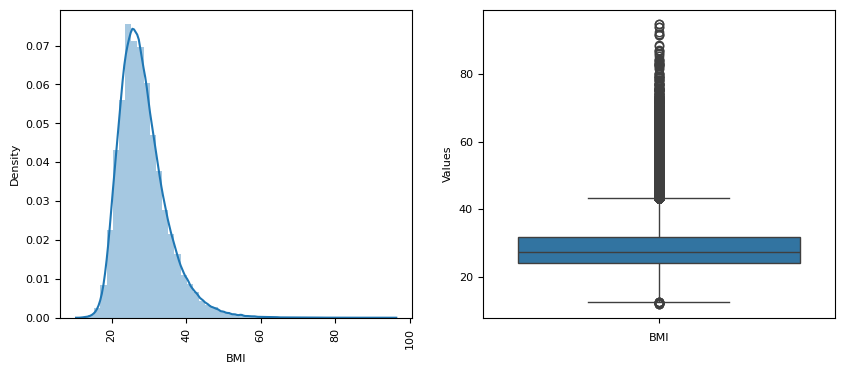

In [63]:
plt.subplots(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
sns.distplot(df_num['BMI'])
plt.xlabel('BMI', fontsize=8)
plt.ylabel('Density', fontsize=8)
plt.subplot(1, 2, 2)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
sns.boxplot(df_num['BMI'])
plt.xlabel('BMI', fontsize=8)
plt.ylabel('Values', fontsize=8)
print('Skewness =',df_num['BMI'].skew())
print('Kurtosis  =',df_num['BMI'].kurt())
plt.show()


##### 1. From observing the skewness values we can say BMI has positive skewness values that means it is right skewed.
##### 2. From observing the kurtosis value we can say BMI has values greater than 3 it means it is leptokurtic.
##### 3. From observing the box plot we can say it has outliers.

##### Further analysis could involve investigating the impact of BMI distributions on any statistical modeling or inference tasks. For instance, skewed distributions might require transformation for better modeling accuracy, while outliers might need to be treated or not needs to be understood in the context of the data.

In [64]:
df_cat = df.select_dtypes(object)
df_cat.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,No,Yes,Very good,No,No,No


HeartDisease


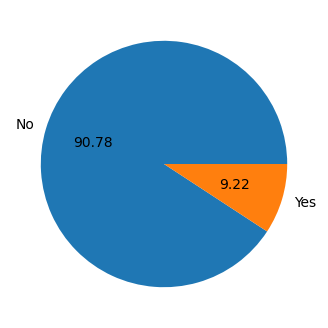

Smoking


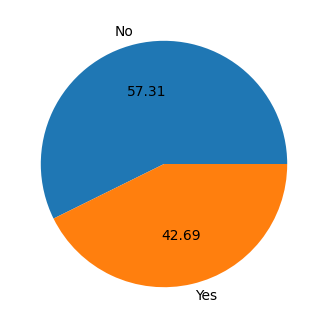

AlcoholDrinking


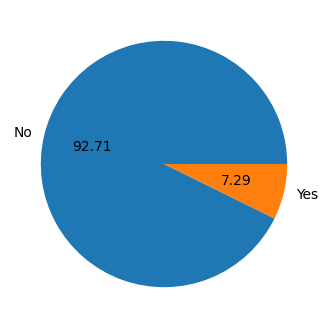

Stroke


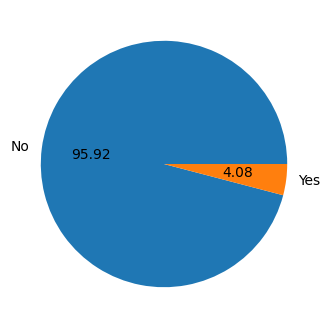

DiffWalking


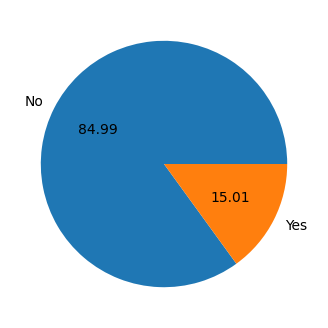

Sex


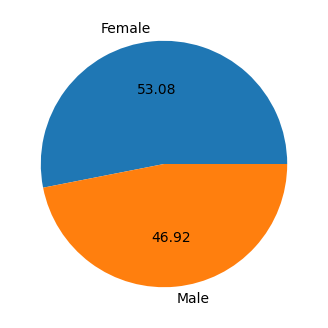

AgeCategory


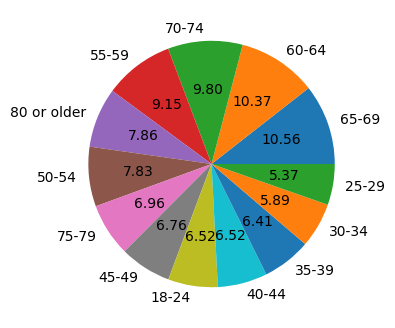

Diabetic


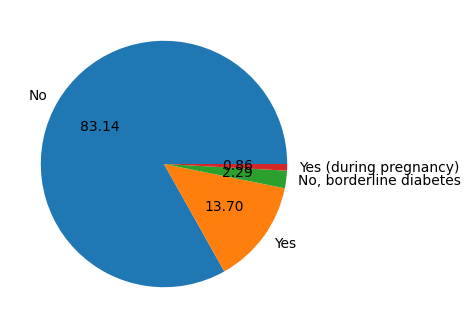

PhysicalActivity


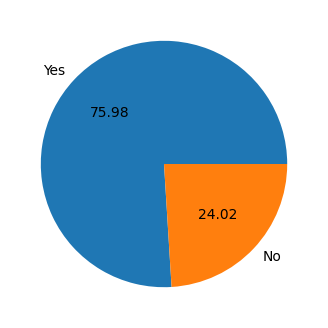

GenHealth


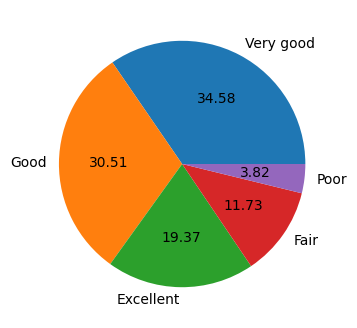

Asthma


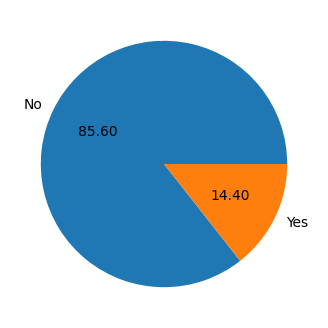

KidneyDisease


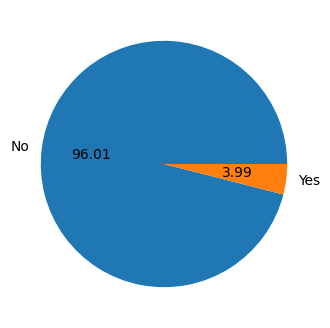

SkinCancer


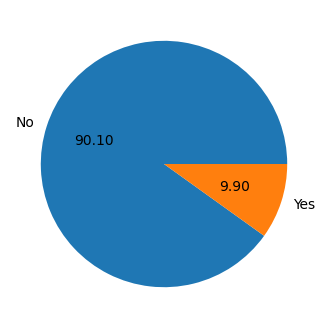

In [65]:
for i in ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']:
    print(i)
    plt.figure(figsize=(5,4))
    z=df_cat[i].value_counts()/len(df_cat)*100
    plt.pie(z,autopct="%.2f",labels=z.index)
    plt.show()

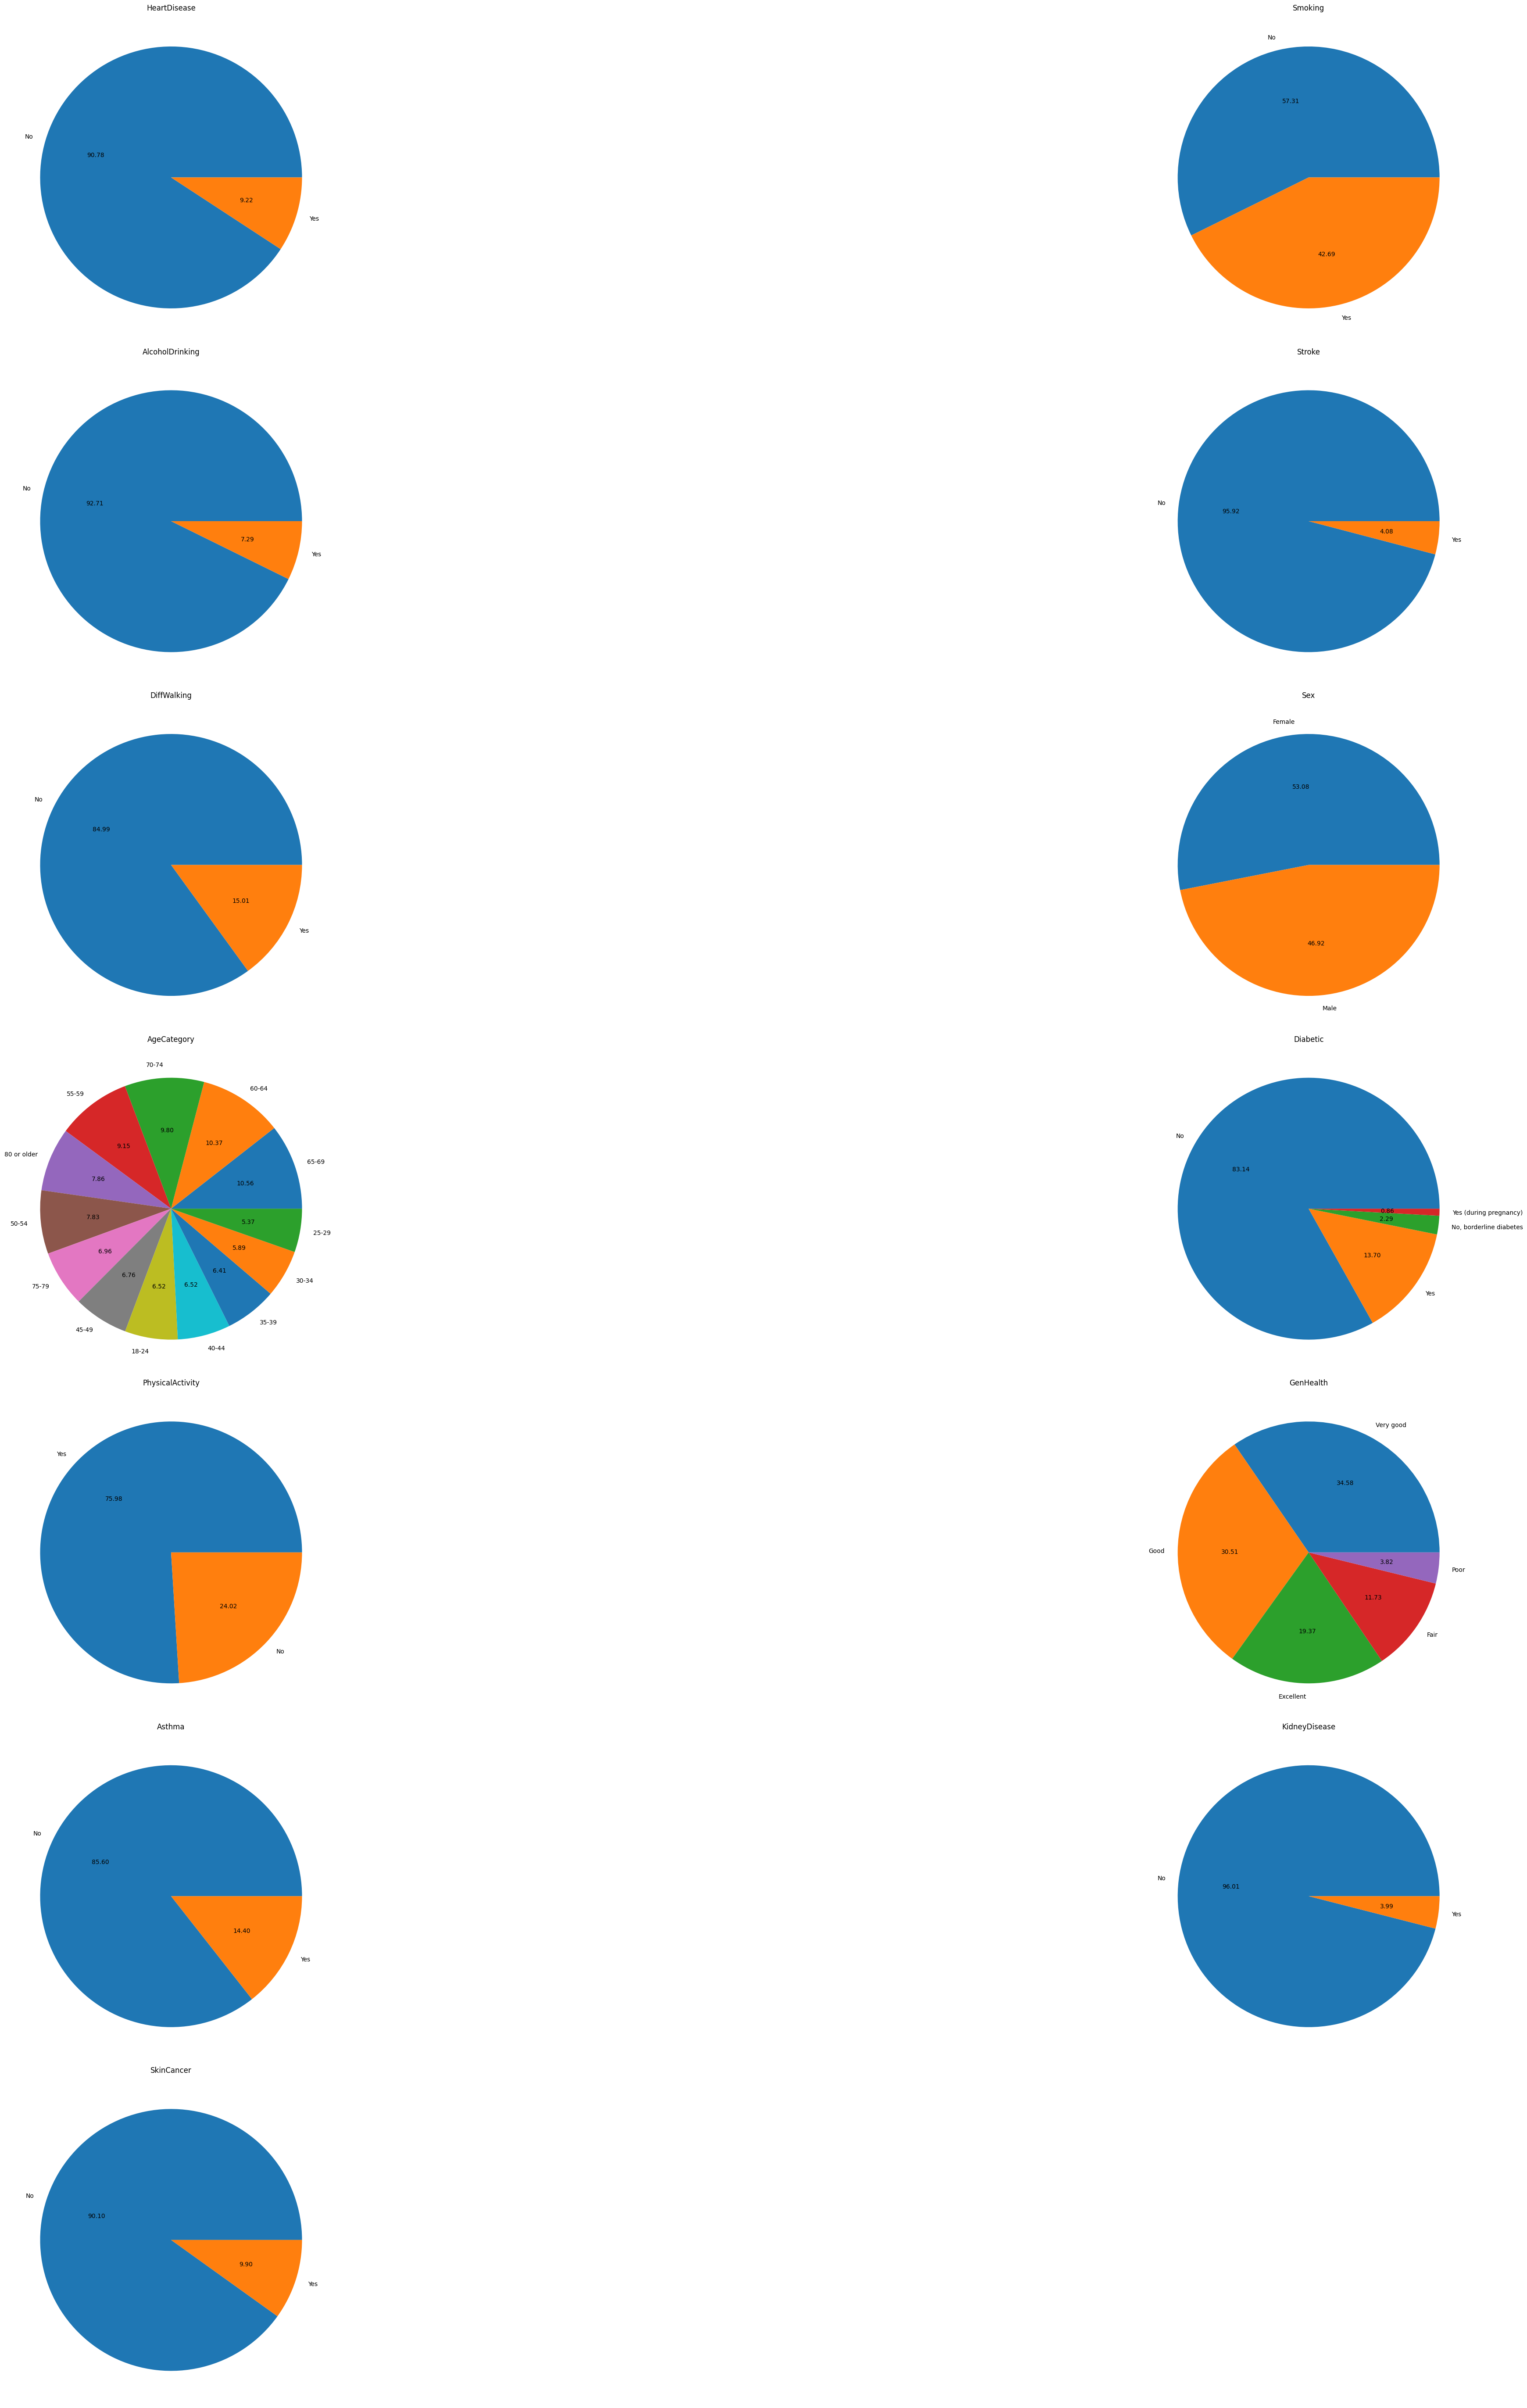

In [66]:
cols=['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer']
plt.text=20
plt.figure(figsize=(60,55))
j = 1
for i in cols:
    plt.subplot(7,2, j)
    plt.title(i)
    z=df_cat[i].value_counts()/len(df_cat)*100
    plt.pie(z,autopct="%.2f",labels=z.index)
    j += 1
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Observations

#### 1) HeartDisease Explains  :-
#####                             90.6% Respondents that have ever not reported having coronary heart disease (CHD) or myocardial infarction (MI)
#####                             9.04% of people have reported of HeartDisease


#### 2) Smoking :-              
#####                             There were 57.77% of people have not smoked at least 100 cigarettes and 42.23% are smoked at least 100 cigarettes till                              now.


#### 3) AlchoholDrinking :-   
##### 92.85% of people are Non-Alchoholic and 7.15% are Heavy drinkers.


#### 4) Stroke :-             
##### 96% of people does not had a stroke and 4% people had a stroke .


#### 5) DiffWalking :-       
##### 14.70% people have Difficulty in walking or climbing stairs and 85.30% people don't have any difficulty.


#### 6) Sex :-               52.02% were female and 47.08% were male.


#### 7) AgeCategory :- It tells how many percentage of people are there in each category :
##### 65-69   :       10.50%, 60-64    :      10.35%, 70-74    :      9.70%, 55-59    :      9.15%, 50-55 :     7.87%,  80 or older:    7.74%,75-79      :    6.87%, 45-49      :    6.80%,18-24      :    6.63%,40-44      :    6.57%, 35-39      :    6.47%,  30-34      :    5.95%, 25-29      :    5.41%


#### 8) Diabetic :-          
#####  No : 83.45%, Yes :13.45%,  No borderline diabetes   :2.25%, Yes (during pregnancy) :0.85%

#### 9) PhysicalActivity :-  
##### 76.37% of Adults who reported doing physical activity or exercise during the past 30 days other than their regular job and 23.63% are not reported.

#### 10) Gen-Health :-        
#####  Very good   : 34.73%, Good        : 30.24%, Excellent   : 19.80%, Fair        : 11.49%, Poor        : 3.74%


#### 11) Asthama :-          
##### 85.86%  people does not have Asthma and 14.14% people have Asthma.


#### 12) KidneyDisease :-    
##### 96.10% People does not have Kidney related issues and 3.90% people have Kidney related issues .

#### 13) SkinCancer :-      
##### 90.29% People does not have skin cancer and 9.71% people have skin cancer.

#### *For Encoded Categorical Data ploting PieChart*

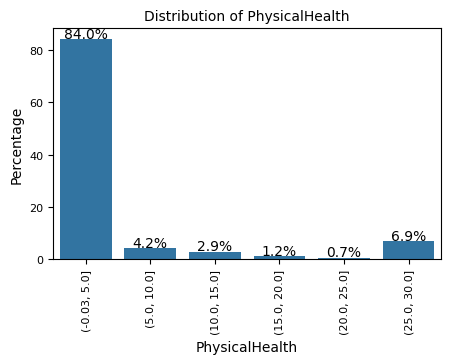

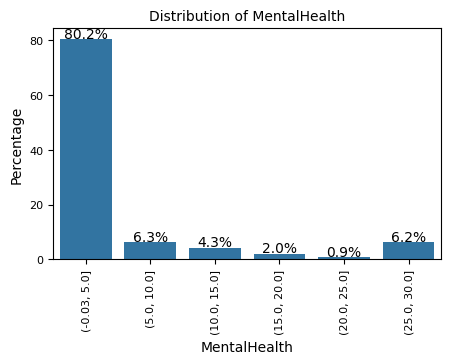

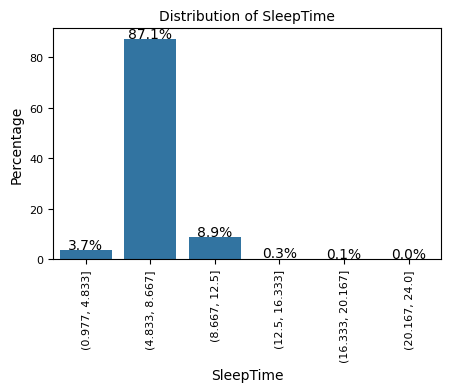

In [67]:
for i in ['PhysicalHealth', 'MentalHealth', 'SleepTime']:
    bins = pd.cut(df_num[i], bins=6)
    plt.figure(figsize=(5,3))
    ax = sns.barplot(x=bins.value_counts().index, y=bins.value_counts().values/len(df_num['SleepTime'])*100)
    plt.xticks(rotation=90, fontsize=8)
    plt.yticks(fontsize=8)
    plt.title(f'Distribution of {i}', fontsize=10)
    plt.xlabel(f'{i}', fontsize=10)
    plt.ylabel('Percentage', fontsize=10)
    total = len(df_num[i])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha="center", fontsize=10)
    plt.show()
#inference:
#related to PhysicalHealth almost 84% of population is suffering for atmost 5 days
#related to MentalHealth almost 80.6% of population is suffering for atmost 5 days
#related SleepTime almost 87.3% of population is able to sleep between atmost 4.8 to 8.6hours

#### Inference:
####   *- Related to Physical Health, almost 84% of the population is suffering for at most 5 days.*
####   *- Related to Mental Health, almost 80.6% of the population is suffering for at most 5 days.*
####   *- Related to Sleep Time, almost 87.3% of the population is able to sleep between at most 4.8 to 8.6 hours.*

In [68]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [69]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No


#### *Distribution Of HeartDiease*

Prevalence of reported heart disease among respondents:
HeartDisease
No     90.777458
Yes     9.222542
Name: proportion, dtype: float64


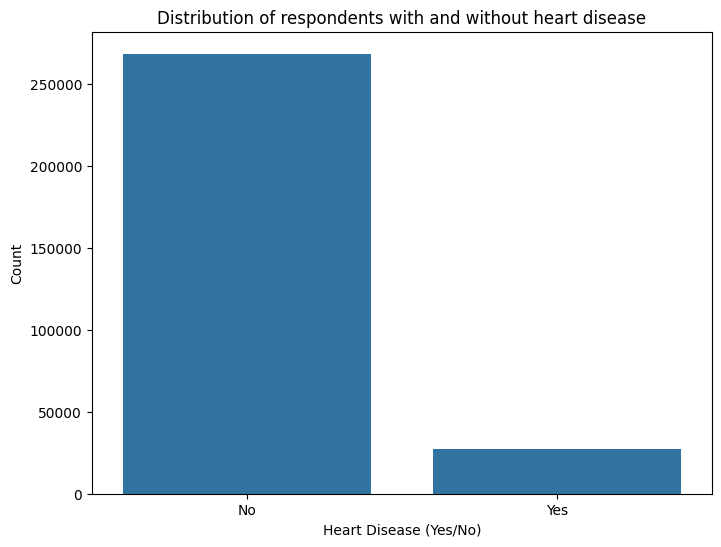

In [70]:
heart_disease_prevalence = df['HeartDisease'].value_counts(normalize=True) * 100
print("Prevalence of reported heart disease among respondents:")
print(heart_disease_prevalence)

plt.figure(figsize=(8, 6))
sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of respondents with and without heart disease')
plt.xlabel('Heart Disease (Yes/No)')
plt.ylabel('Count')
plt.show()

#### *Explaination of the Proportion of respondents falling into different BMI categories*

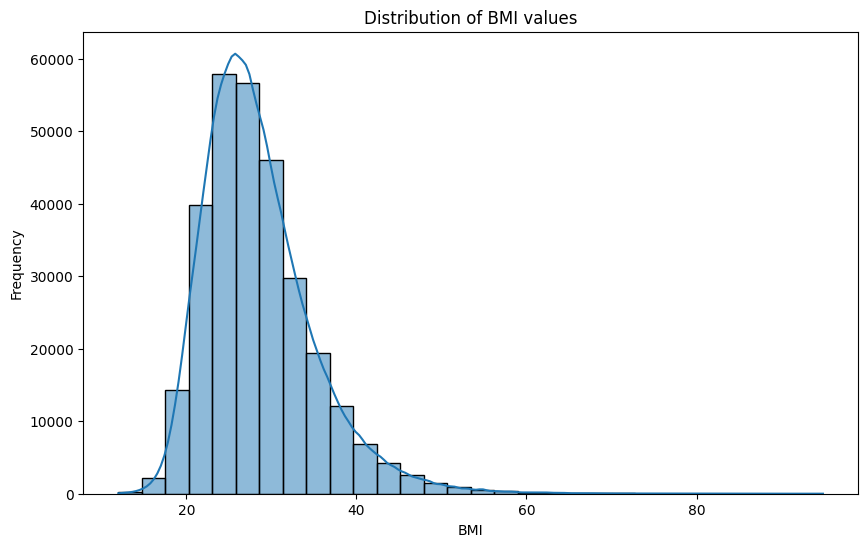

Proportion of respondents falling into different BMI categories:
BMI_Category
Overweight       34.719580
Obese            34.214249
Normal weight    29.348452
Underweight       1.717719
Name: proportion, dtype: float64


In [71]:
# BMI
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=30, kde=True)
plt.title('Distribution of BMI values')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()


# Categorizing BMI
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels)

bmi_category_counts = df['BMI_Category'].value_counts(normalize=True) * 100
print("Proportion of respondents falling into different BMI categories:")
print(bmi_category_counts)

### Distribution of smoking status

Prevalence of current smokers:
Smoking
No     57.305128
Yes    42.694872
Name: proportion, dtype: float64


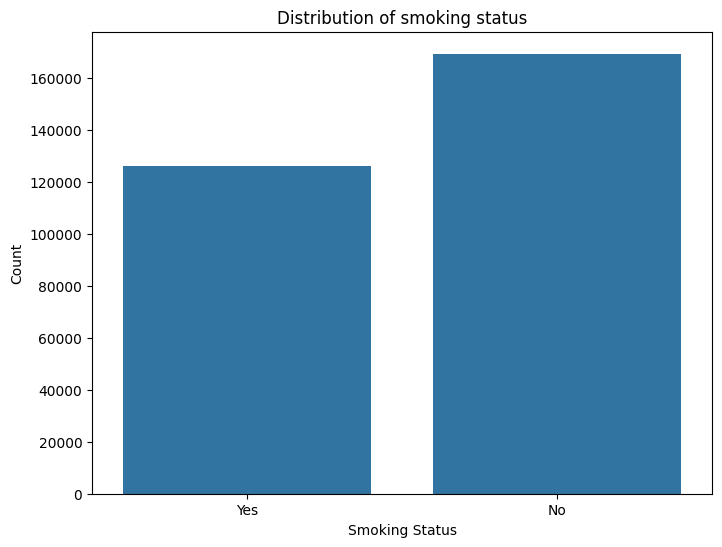

In [72]:
# Smoking
smoking_prevalence = df['Smoking'].value_counts(normalize=True) * 100
print("Prevalence of current smokers:")
print(smoking_prevalence)

plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', data=df)
plt.title('Distribution of smoking status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

### Distribution of alcohol consumption levels

Prevalence of heavy drinking among respondents:
AlcoholDrinking
No     92.709765
Yes     7.290235
Name: proportion, dtype: float64


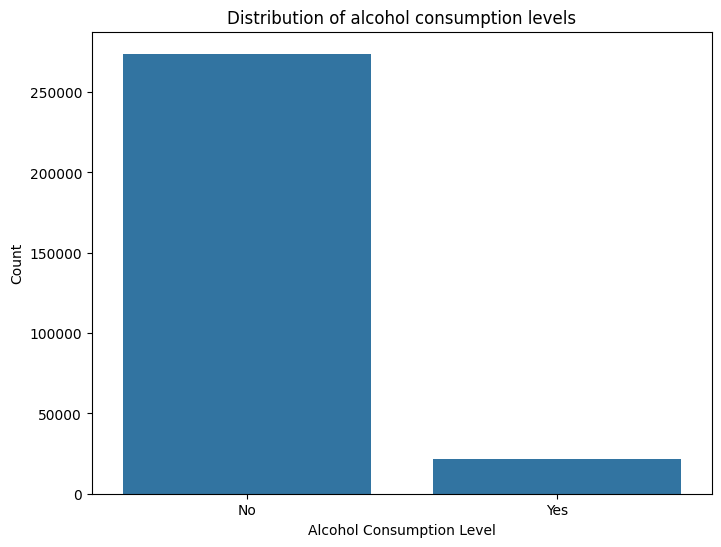

In [73]:
# AlcoholDrinking
alcohol_prevalence = df['AlcoholDrinking'].value_counts(normalize=True) * 100
print("Prevalence of heavy drinking among respondents:")
print(alcohol_prevalence)

plt.figure(figsize=(8, 6))
sns.countplot(x='AlcoholDrinking', data=df)
plt.title('Distribution of alcohol consumption levels')
plt.xlabel('Alcohol Consumption Level')
plt.ylabel('Count')
plt.show()

### Prevalence of Diabetes among respondents

Prevalence of Diabetes among respondents:
Diabetic
No                         83.139279
Yes                        13.704519
No, borderline diabetes     2.291758
Yes (during pregnancy)      0.864444
Name: proportion, dtype: float64


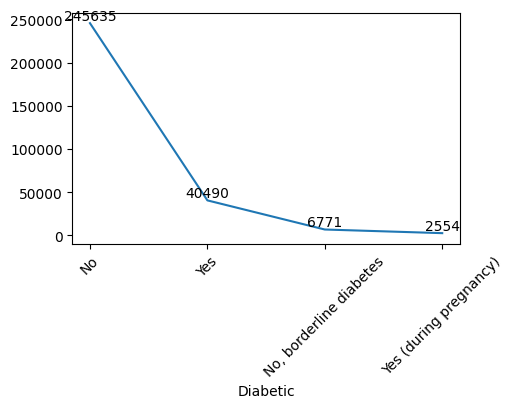

In [74]:
plt.figure(figsize=(5,3))
diabetic_prevalence = df['Diabetic'].value_counts(normalize=True) * 100
print("Prevalence of Diabetes among respondents:")
print(diabetic_prevalence)
ax = sns.lineplot(x=df['Diabetic'].value_counts().index, y=df['Diabetic'].value_counts().values)
for x, y in zip(df['Diabetic'].value_counts().index, df['Diabetic'].value_counts().values):
    ax.text(x, y, str(y), ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.show()

### Distribution of respondents with and without a history of stroke

Prevalence of reported strokes among respondents:
Stroke
No     95.918091
Yes     4.081909
Name: proportion, dtype: float64


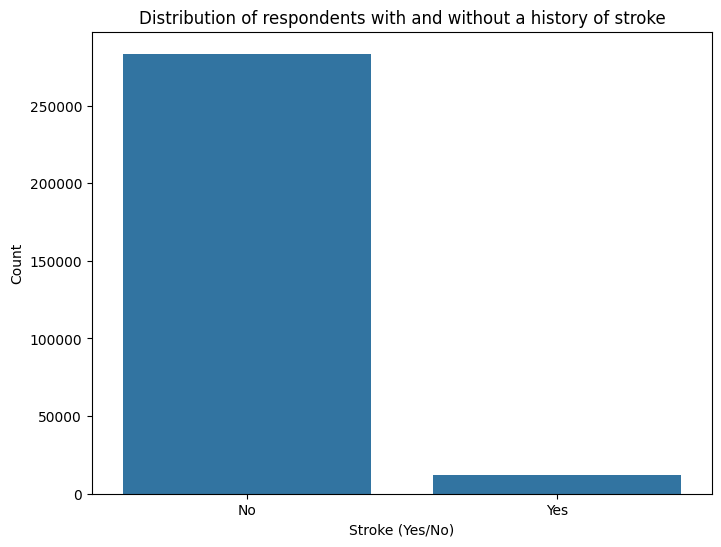

In [75]:
# Stroke
stroke_prevalence = df['Stroke'].value_counts(normalize=True) * 100
print("Prevalence of reported strokes among respondents:")
print(stroke_prevalence)

plt.figure(figsize=(8, 6))
sns.countplot(x='Stroke', data=df)
plt.title('Distribution of respondents with and without a history of stroke')
plt.xlabel('Stroke (Yes/No)')
plt.ylabel('Count')
plt.show()

### Distribution of reported physical activity levels

Prevalence of reported physical activity among respondents:
PhysicalActivity
Yes    75.981046
No     24.018954
Name: proportion, dtype: float64


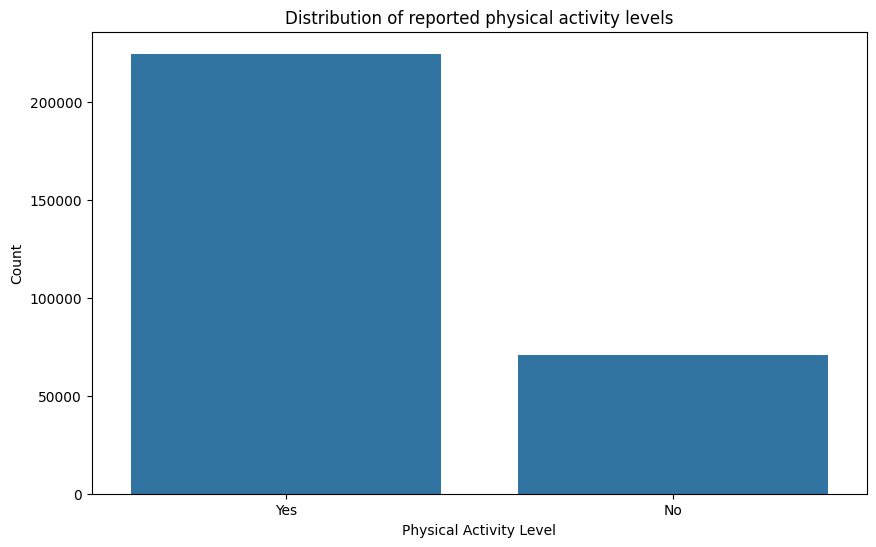

In [76]:
# PhysicalActivity
physical_activity_prevalence = df['PhysicalActivity'].value_counts(normalize=True) * 100
print("Prevalence of reported physical activity among respondents:")
print(physical_activity_prevalence)

plt.figure(figsize=(10, 6))
sns.countplot(x='PhysicalActivity', data=df)
plt.title('Distribution of reported physical activity levels')
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.show()

### Distribution of individuals with and without asthma

Prevalence of asthma among respondents:
Asthma
No     85.597225
Yes    14.402775
Name: proportion, dtype: float64


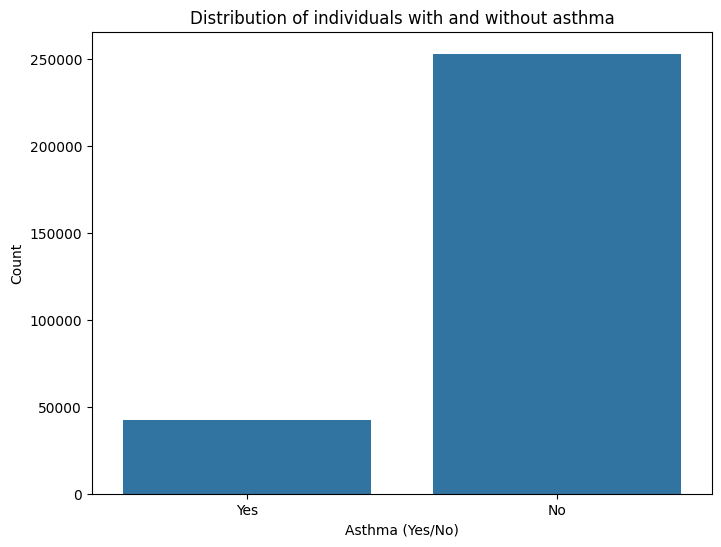

In [77]:
# Asthma
asthma_prevalence = df['Asthma'].value_counts(normalize=True) * 100
print("Prevalence of asthma among respondents:")
print(asthma_prevalence)

plt.figure(figsize=(8, 6))
sns.countplot(x='Asthma', data=df)
plt.title('Distribution of individuals with and without asthma')
plt.xlabel('Asthma (Yes/No)')
plt.ylabel('Count')
plt.show()

### Distribution of individuals with and without kidney disease

Prevalence of kidney-related issues among respondents:
KidneyDisease
No     96.014893
Yes     3.985107
Name: proportion, dtype: float64


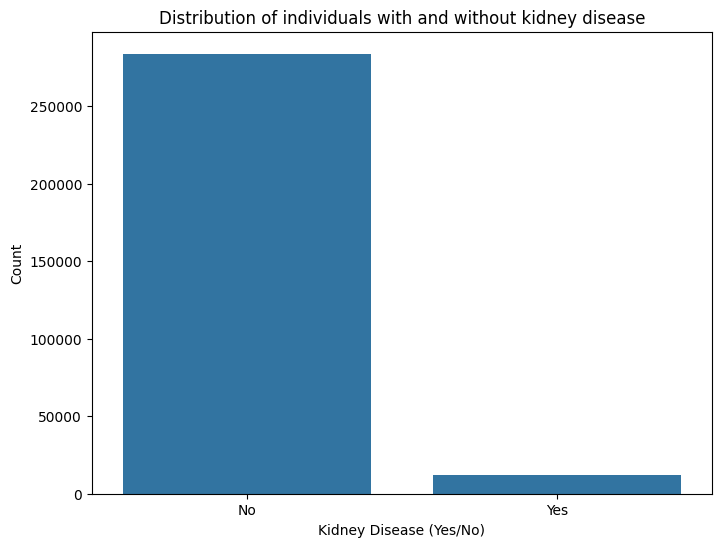

In [78]:
# KidneyDisease
kidney_disease_prevalence = df['KidneyDisease'].value_counts(normalize=True) * 100
print("Prevalence of kidney-related issues among respondents:")
print(kidney_disease_prevalence)

plt.figure(figsize=(8, 6))
sns.countplot(x='KidneyDisease', data=df)
plt.title('Distribution of individuals with and without kidney disease')
plt.xlabel('Kidney Disease (Yes/No)')
plt.ylabel('Count')
plt.show()


### Distribution of individuals with and without skin cancer

Prevalence of skin cancer among respondents:
SkinCancer
No     90.095109
Yes     9.904891
Name: proportion, dtype: float64


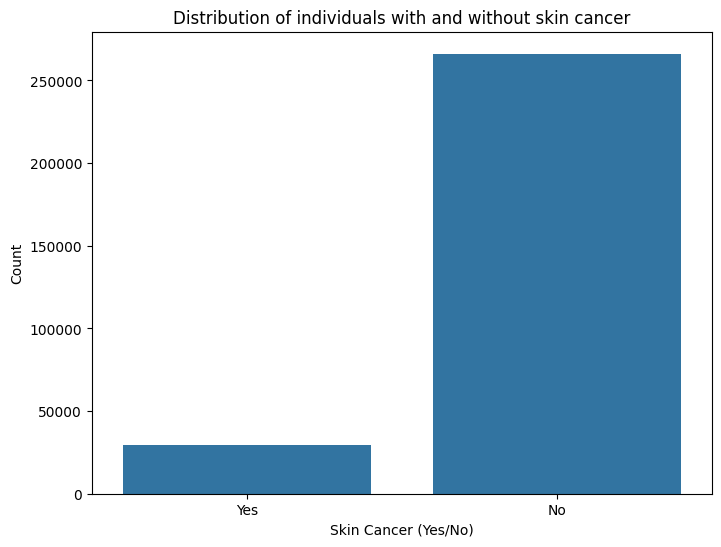

In [79]:
# SkinCancer
skin_cancer_prevalence = df['SkinCancer'].value_counts(normalize=True) * 100
print("Prevalence of skin cancer among respondents:")
print(skin_cancer_prevalence)

plt.figure(figsize=(8, 6))
sns.countplot(x='SkinCancer', data=df)
plt.title('Distribution of individuals with and without skin cancer')
plt.xlabel('Skin Cancer (Yes/No)')
plt.ylabel('Count')
plt.show()

#### *Bi-Variate Analysis*

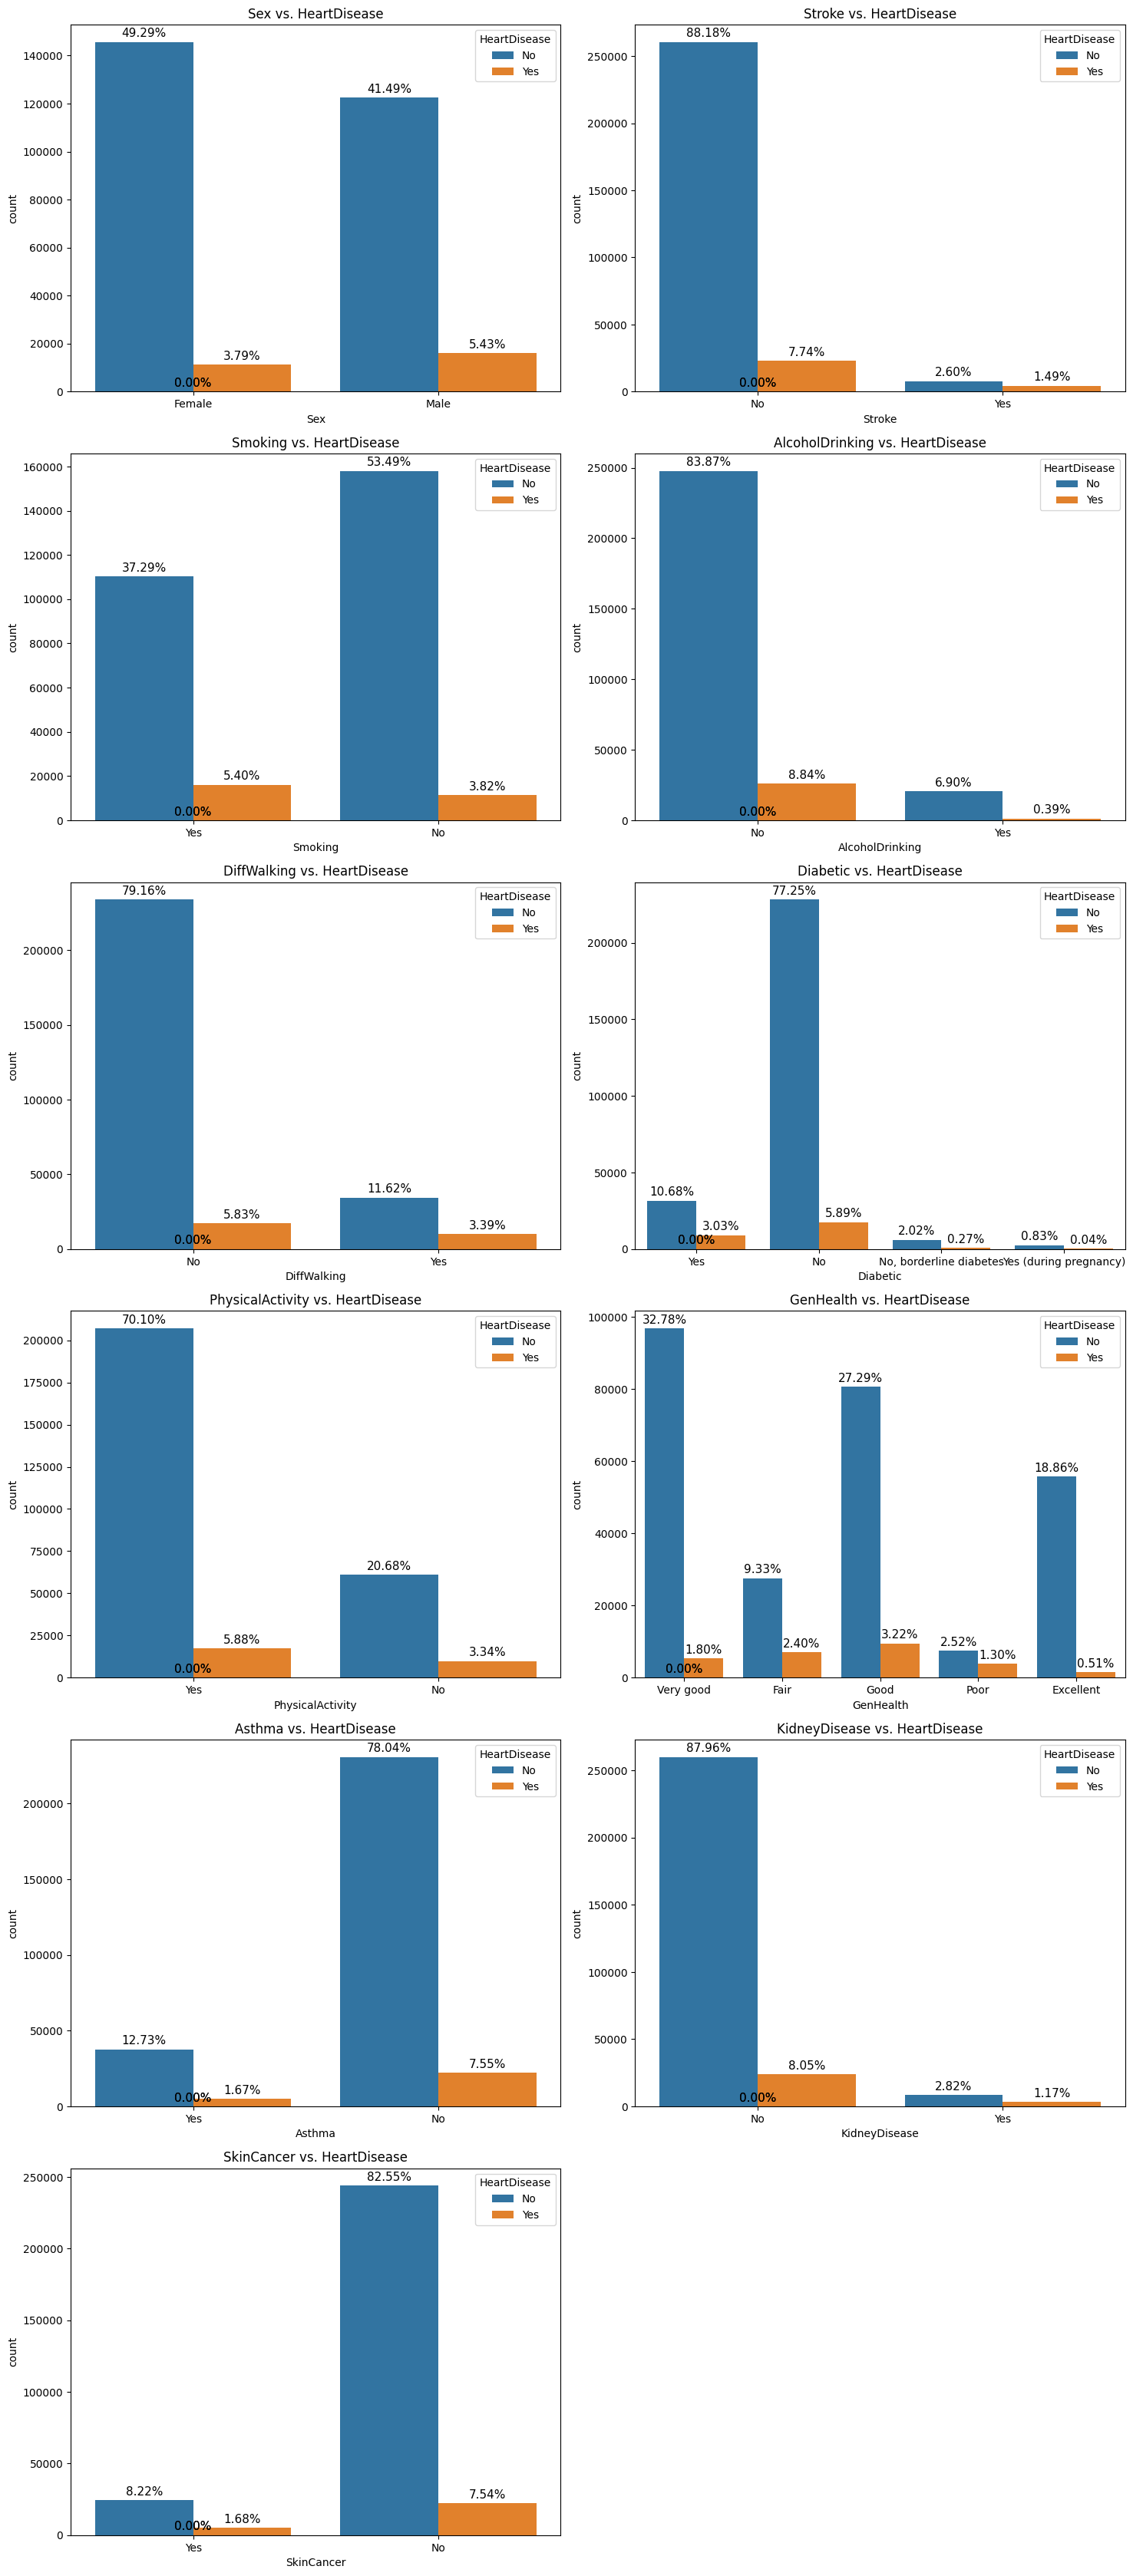

In [80]:
# Create a set of variables to plot
variables = [
    ('Sex','HeartDisease' ),
    ('Stroke','HeartDisease' ),
    ('Smoking', 'HeartDisease'),
    ('AlcoholDrinking', 'HeartDisease'),
    ('DiffWalking', 'HeartDisease'),
    ('Diabetic', 'HeartDisease'),
    ('PhysicalActivity', 'HeartDisease'),
    ('GenHealth', 'HeartDisease'),
    ('Asthma', 'HeartDisease'),
    ('KidneyDisease', 'HeartDisease'),
    ('SkinCancer', 'HeartDisease')
]

# Set the figure size
plt.figure(figsize=(15, 50))

# Loop through the variable pairs
for i, (var1, var2) in enumerate(variables, start=1):
    plt.subplot(9, 2, i)

    # For object vs non-object, use a bar plot
    if df[var1].dtype == 'object' and df[var2].dtype != 'object':
        plot = sns.barplot(x=var1, y=var2, data=df, estimator=lambda x: len(x), ci=None)

        # Annotate each bar with the percentage
        total = df[var2].count()  # Total number of items
        for p in plot.patches:
            height = p.get_height()
            percentage = 100 * height / total  # Calculate the percentage
            plot.annotate(f'{percentage:.2f}%',
                          (p.get_x() + p.get_width() / 2., height),
                          ha='center', va='center',
                          fontsize=11, color='black',
                          xytext=(0, 8),
                          textcoords='offset points')

    # For object vs object, use a count plot
    elif df[var1].dtype == 'object' and df[var2].dtype == 'object':
        plot = sns.countplot(x=var1, hue=var2, data=df)

        # Annotate each bar with the count and percentage
        for p in plot.patches:
            count = p.get_height()
            total = df[var1].value_counts().sum()  # Total items for that category
            percentage = 100 * count / total
            plot.annotate(f'{percentage:.2f}%',
                          (p.get_x() + p.get_width() / 2., count),
                          ha='center', va='center',
                          fontsize=11, color='black',
                          xytext=(0, 8),
                          textcoords='offset points')

    plt.title(f'{var1} vs. {var2}')

plt.tight_layout()  # Adjust the spacing between plots
plt.show()  # Display the plots


## sex vs Heart disease:
#### Gender vs Heart Disease: Among females, the probability of developing heart disease is 3.79%,
#### which is lower than the corresponding probability among males, which stands at 5.43%.

## Stroke vs Heart Disease:
####  Without a history of stroke, the likelihood of not developing heart disease is 88.18%, while the likelihood of developing heart disease is 7.74%.
#### Conversely, if an individual has previously experienced a stroke, the probability of developing heart disease decreases to 1.49%
#### while the probability of not developing heart disease increases to 2.6%.


## Smoking vs HeartDisease:
#### Smokers have a higher chance of getting heart disease compared to non-smokers. For smokers, the likelihood of developing
#### heart disease is 5.4% higher than for non-smokers, who have a lower risk at 3.82%. Additionally, smokers are less likely to avoid heart disease,
#### with only 37.29% not prone to it, while non-smokers have a higher likelihood of 53.49% in not being prone to heart disease.


## AlcoholDrinking vs HeartDisease:
#### When it comes to heart disease, alcohol drinkers face a greater risk compared to non-drinkers. Drinkers have an 8.84% higher chance of developing
#### heart disease than non-drinkers, who have a lower risk of only 0.39%. Moreover, drinkers are less likely to avoid heart disease, with only 6.9% not
#### prone to it, while non-drinkers have a significantly higher likelihood of 83.87% in not being prone to heart disease.


## DiffWalking vs HeartDisease:
#### When it comes to heart disease, those who struggle to walk are at a higher risk compared to those who can walk easily.
#### People who have difficulty walking have a 5.83% higher chance of developing heart disease than those who can walk without difficulty,
#### who have a lower risk of only 3.39%. Also, those who have trouble walking are less likely to avoid heart disease, with only 11.62% not prone to it,
#### while those who can walk easily have a much higher likelihood of 79.16% in not being prone to heart disease.


## Diabetic vs HeartDisease:
#### For people with diabetes, the risk of heart disease is higher, with 3.03% developing it and 10.68% not developing it.
#### But for those without diabetes, the risk is lower, with 77.25% not developing heart disease and only 5.89% developing it.


## PhysicalActivity vs HeartDisease:
#### Among individuals with no heart disease, those who engage in physical activity have a significantly higher proportion (72.07%) compared to
#### those who do not (19.37%). Conversely, among individuals with heart disease, the percentage of those engaging in physical activity (5.47%)
#### is notably lower compared to those who do not (3.09%).

## GenHealth vs HeartDisease:
#### The analysis reveals significant variations in heart disease rates based on general health categories. When individuals report their general health
#### as "Very Good," 32.78% do not have heart disease, while 1.80% do. In the "Fair" category, 9.33% of respondents are free from heart disease,
#### whereas 7.40% have it.A similar pattern is seen in the "Good" category, where 77.29% of people are without heart disease, but 3.22% are diagnosed
#### with it. In the "Poor" category, 2.52% have no heart disease, while 1.30% do. Lastly, in the "Excellent" health category, 18.86% are without heart
#### disease, and only 0.51% report having it.Overall, these figures suggest a trend where better general health correlates with a lower prevalence of
#### heart disease.

## Asthma vs HeartDisease :
#### Asthma may be associated with a higher likelihood of heart disease. Among those without Asthma, 79.58% do not have heart disease, while 7.02% do.
#### On the other hand, among individuals with Asthma, the proportion without heart disease is 11.86%, while the proportion with heart disease is 1.54%.
#### These figures suggest that individuals with Asthma have a higher relative rate of heart disease compared to those without Asthma. While most people
#### without Asthma do not have heart disease, the presence of Asthma appears to increase the proportion of those who do.

## KidneyDisease vs HeartDisease:
#### a correlation between KidneyDisease and HeartDisease. Among those without KidneyDisease, 88.84% do not have heart disease, while 7.48% do.
#### In contrast, among those diagnosed with KidneyDisease, the proportion of people without heart disease is much smaller, at 2.60%, whereas the
#### proportion with heart disease is notably higher at 1.08%.
#### These statistics suggest that having KidneyDisease is associated with a higher rate of heart disease. While the majority of people without
#### KidneyDisease do not have heart disease, individuals with KidneyDisease exhibit a relatively higher percentage of heart disease.


## SkinCancer vs HeartDisease:
####  the relationship between SkinCancer and HeartDisease. Among people who don't have SkinCancer, 83.67% do not have heart disease,
#### while 7.00% do. Conversely, among those with SkinCancer, 7.77% don't have heart disease, but 1.56% do.
#### This data suggests that having SkinCancer is linked to a slightly higher incidence of heart disease compared to those without SkinCancer.
#### Although most individuals without SkinCancer are free from heart disease, a greater proportion of people with SkinCancer are diagnosed with heart
#### disease.


## "Heart Disease Distribution by Age Category"

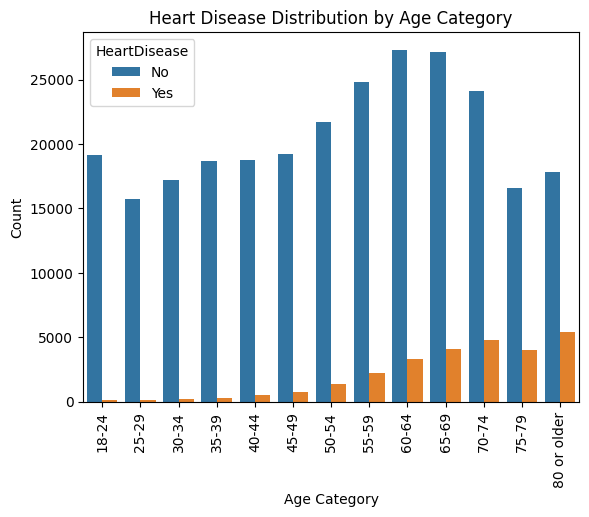

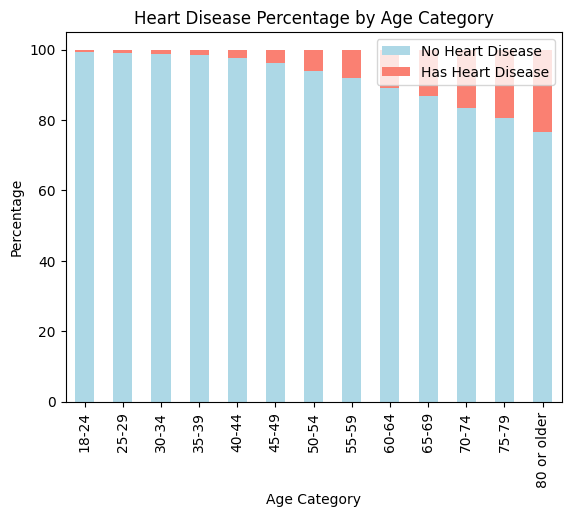

In [81]:
# Create a count plot
sns.countplot(x='AgeCategory', hue='HeartDisease', data=df, order=sorted(df['AgeCategory'].unique()))
plt.title("Heart Disease Distribution by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


# Calculate the percentage of people with heart disease in each age category
heart_disease_counts = df.groupby(['AgeCategory', 'HeartDisease']).size().unstack().fillna(0)
heart_disease_percent = heart_disease_counts.div(heart_disease_counts.sum(axis=1), axis=0) * 100

# Plot the percentage of individuals with heart disease by age category
heart_disease_percent.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title("Heart Disease Percentage by Age Category")
plt.xlabel("Age Category")
plt.ylabel("Percentage")
plt.legend(['No Heart Disease', 'Has Heart Disease'])
plt.show()


## AgeCategory vs HeartDisease:
#### Data reveals a clear pattern of increasing heart disease prevalence as age increases. Among individuals aged 18-24,
#### the majority (6.55%) do not have heart disease, while only a very small percentage (0.04%) do. As age progresses, both the proportion of those
#### without heart disease and those with heart disease gradually increase.
#### From ages 25-29, 5.26% do not have heart disease and 0.04% do. This proportion rises slightly in the 30-34 age range, with 5.79% without
#### heart disease and 0.07% with it. This trend continues through ages 35-39 (6.33% without, 0.09% with), 40-44 (6.42% without, 0.15% with), and
#### 45-49 (6.58% without, 0.23% with).
#### The percentages of heart disease rise more notably among older age groups. In the 50-54 age range, 7.50% do not have heart disease, but the
#### proportion with heart disease has increased to 0.43%. This trend continues for 55-59 (8.62% without, 0.69% with), 60-64 (9.49% without, 1.04% with),
#### and 65-69 (9.40% without, 1.28% with).
#### Among those aged 70-74, the proportion without heart disease is 8.20%, while those with heart disease is 1.52%. This ratio shifts as we move into
#### the older age groups. In the 75-79 range, 5.45% don't have heart disease, but 1.27% do. Finally, among those aged 80 or older, 5.85% are without
#### heart disease, but the rate of those with heart disease is the highest at 1.70%.
#### These results illustrate a trend where the likelihood of heart disease increases with age, with a marked increase beginning in the 60-64 age range
#### and continuing through older age groups.

## Average BMI for Heart Disease and Non-Heart Disease

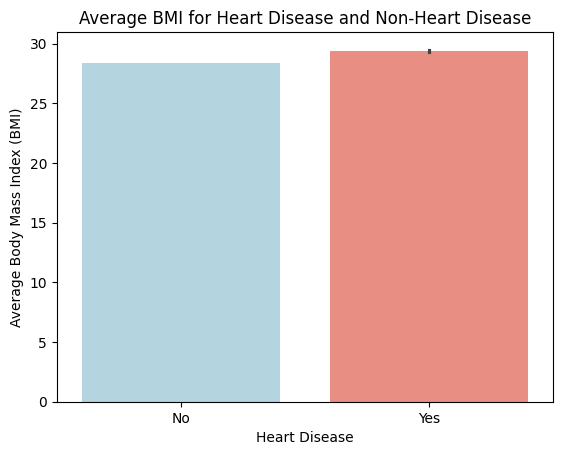

In [83]:
sns.barplot(x='HeartDisease', y='BMI', data=df, palette=['lightblue', 'salmon'])
plt.title("Average BMI for Heart Disease and Non-Heart Disease")
plt.xlabel("Heart Disease")
plt.ylabel("Average Body Mass Index (BMI)")
plt.show()

### BMI Density Plot by Heart Disease Status

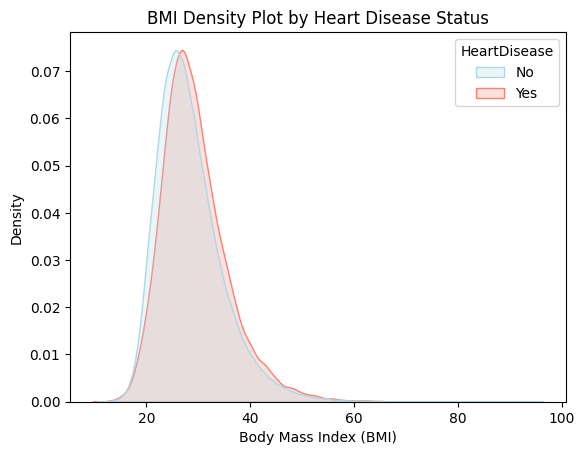

In [84]:
sns.kdeplot(data=df, x='BMI', hue='HeartDisease', shade=True, common_norm=False, palette=['lightblue', 'salmon'])
plt.title("BMI Density Plot by Heart Disease Status")
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Density")
plt.show()

## BMI vs HeartDisease:
####  As the BMI increases likelyhood the probability of proning to the HeartDisease is also Slightly Increasing as per, It enumerates that the BMI  plays Significant Role in Predicting the Heart Disease



## Stacked Bar Plot for Mental Health and Heart Disease

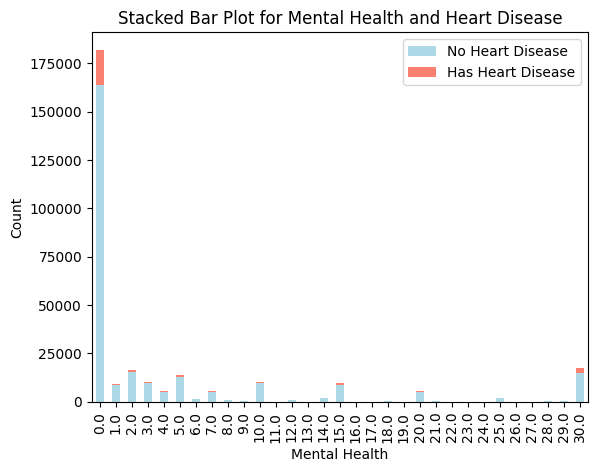

In [85]:
# Create a stacked bar plot to show proportions within categories
heart_disease_counts = df.groupby(['MentalHealth', 'HeartDisease']).size().unstack().fillna(0)

# Plot the counts of individuals with and without heart disease in each physical health category
heart_disease_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title("Stacked Bar Plot for Mental Health and Heart Disease")
plt.xlabel("Mental Health")
plt.ylabel("Count")
plt.legend(['No Heart Disease', 'Has Heart Disease'])
plt.show()

## Mental Health vs Heart Disease:
#### The data suggests that a higher number of mentally unhealthy days is linked to a greater risk of heart disease. For those with zero mentally
#### unhealthy days, 58.53% do not have heart disease, while only 5.70% do. As the number of mentally unhealthy days increases, the proportion of people
#### with heart disease generally rises, though it remains relatively low.
#### For instance, with 10 mentally unhealthy days, 3.04% are without heart disease, while 0.25% have it. At the extreme end, those with 30 mentally
#### unhealthy days, 4.72% are without heart disease, while 0.72% are with it.
#### These numbers suggest that while heart disease becomes more likely with more mentally unhealthy days, the majority of people, even those with many mentally unhealthy days, do not have heart disease.



## Stacked Bar Plot for Physical Health and Heart Disease

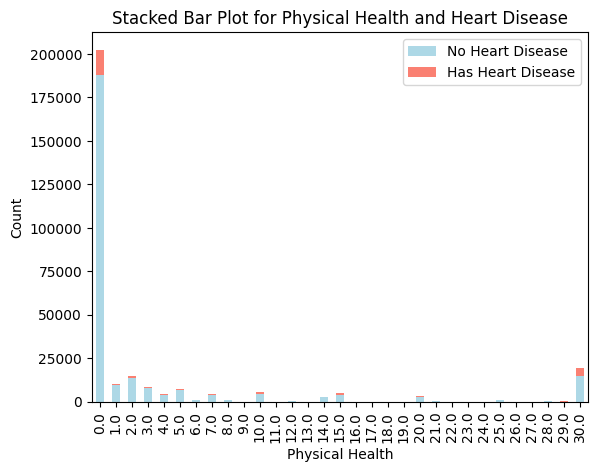

In [86]:
# Create a stacked bar plot to show proportions within categories
heart_disease_counts = df.groupby(['PhysicalHealth', 'HeartDisease']).size().unstack().fillna(0)

# Plot the counts of individuals with and without heart disease in each physical health category
heart_disease_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title("Stacked Bar Plot for Physical Health and Heart Disease")
plt.xlabel("Physical Health")
plt.ylabel("Count")
plt.legend(['No Heart Disease', 'Has Heart Disease'])
plt.show()


## Physical Health vs Heart Disease:
#### data shows that as physically unhealthy days increase, the likelihood of having heart disease tends to rise. Individuals with no physically
#### unhealthy days are more likely not to have heart disease (66.34% without heart disease, compared to 4.51% with heart disease).
#### This ratio shifts as the number of physically unhealthy days increases.
#### For those with 1 physically unhealthy day, 3.09% don't have heart disease, and 0.19% do. By the time the count reaches 30 physically unhealthy days,
#### the proportion of people without heart disease is 4.66%, while those with heart disease represent 1.44%.
#### While the data suggests a correlation between physically unhealthy days and heart disease, a large proportion of individuals across all levels of
#### physically unhealthy days do not have heart disease.

## Stacked Bar Plot for SleepTime and Heart Disease

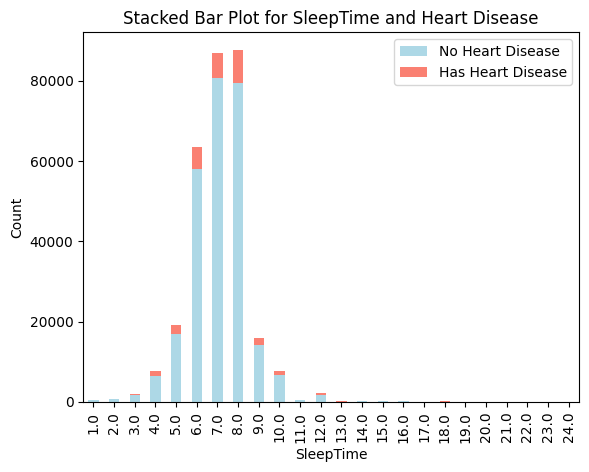

In [87]:
# Create a stacked bar plot to show proportions within categories
heart_disease_counts = df.groupby(['SleepTime', 'HeartDisease']).size().unstack().fillna(0)

# Plot the counts of individuals with and without heart disease in each 'SleepTime' category
heart_disease_counts.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title("Stacked Bar Plot for SleepTime and Heart Disease")
plt.xlabel('SleepTime')
plt.ylabel("Count")
plt.legend(['No Heart Disease', 'Has Heart Disease'])
plt.show()


## SleepTime and Heart Disease:
#### data suggests that the risk of heart disease varies with different sleep durations. People who sleep between 7 and 8 hours per night tend to have
#### the lowest rates of heart disease, with 28.59% and 27.91% respectively not having heart disease, while 1.98% and 2.61% do.
#### In contrast, those with shorter or longer sleep durations generally have higher rates of heart disease. For example, among those sleeping
#### 1 to 3 hours, the rates of heart disease are low but increase with longer durations. Among those sleeping 10 hours, the rate of heart disease
#### is 0.36%, compared to 2.07% without heart disease.
#### This trend indicates that a balanced sleep duration of around 7 to 8 hours correlates with a lower risk of heart disease, while significantly
#### shorter or longer sleep times may be associated with a higher risk.

## *Multi-Variate Analysis*

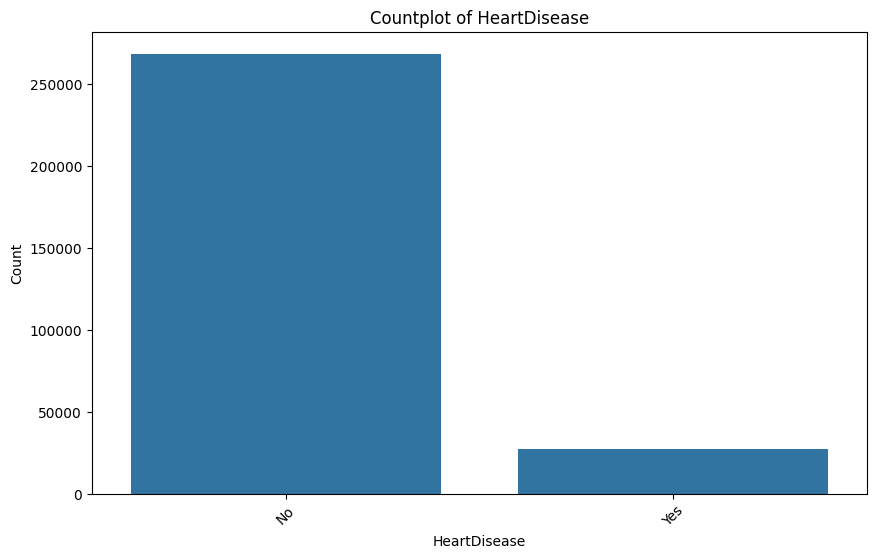

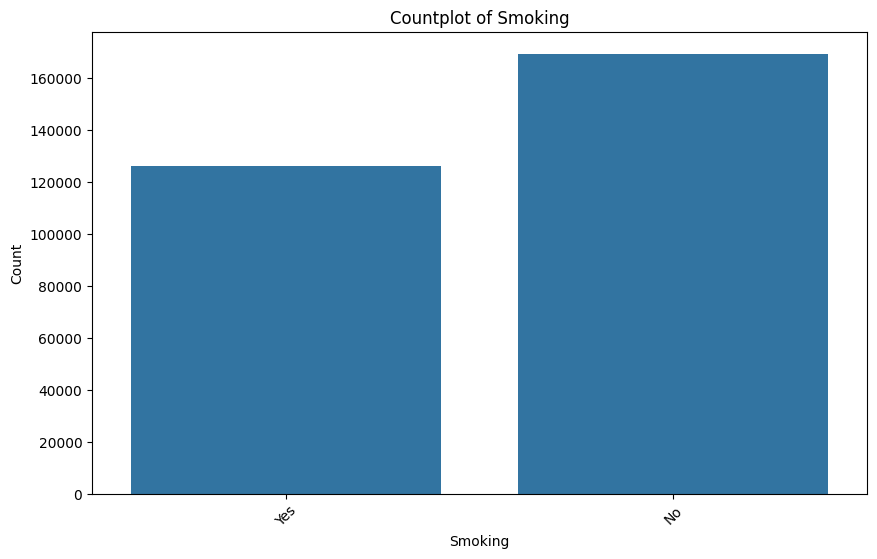

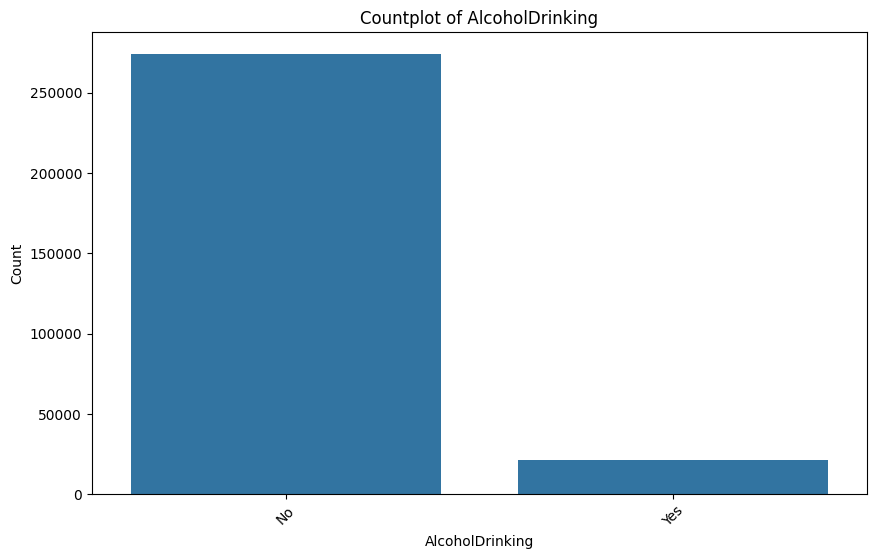

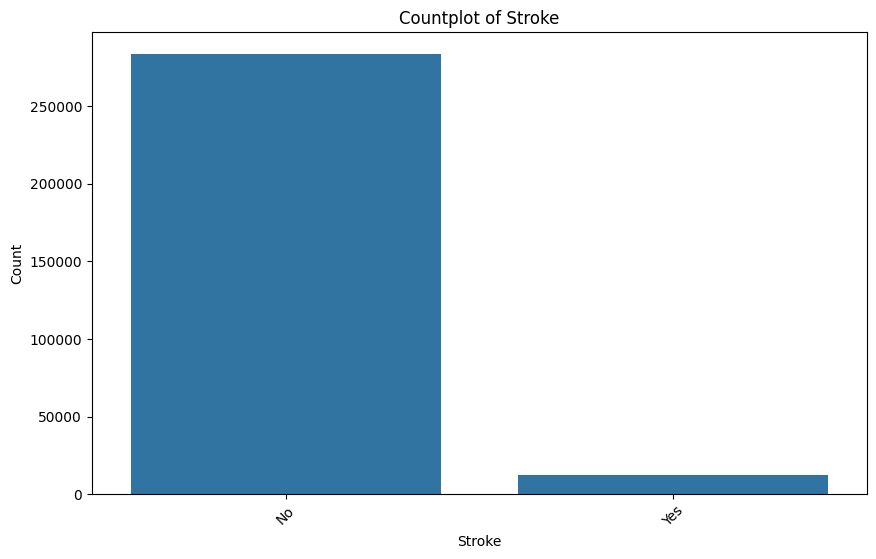

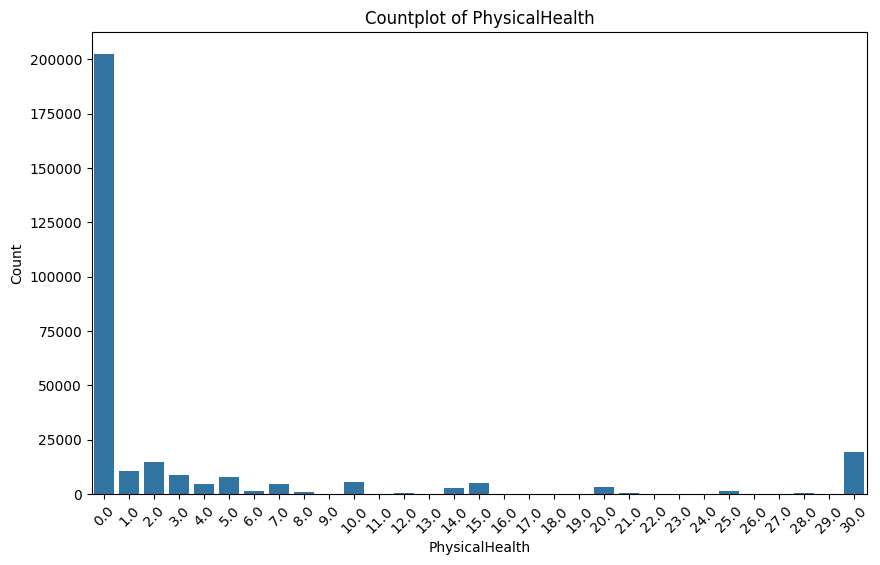

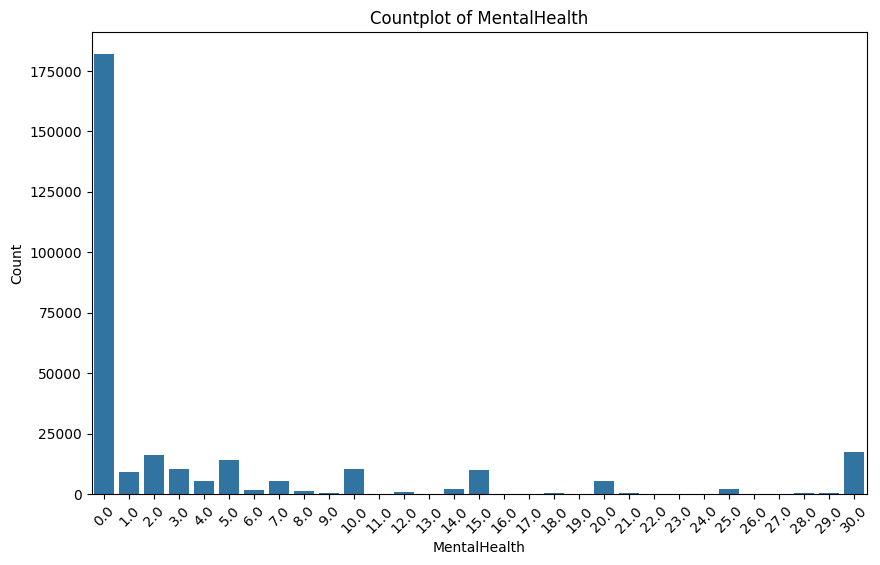

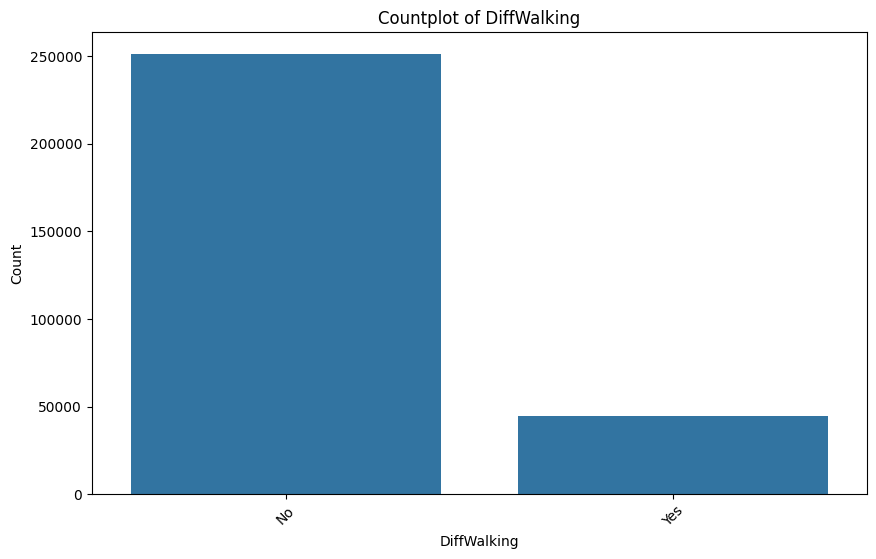

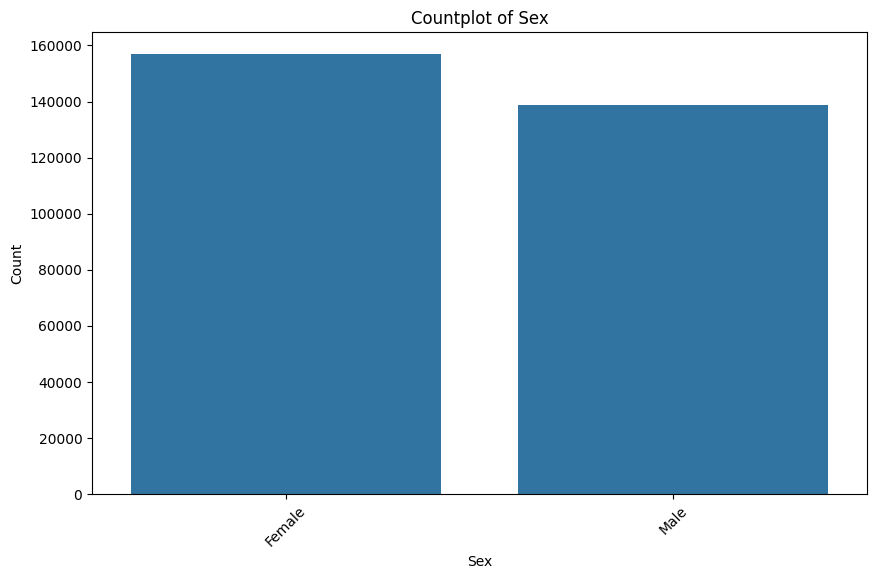

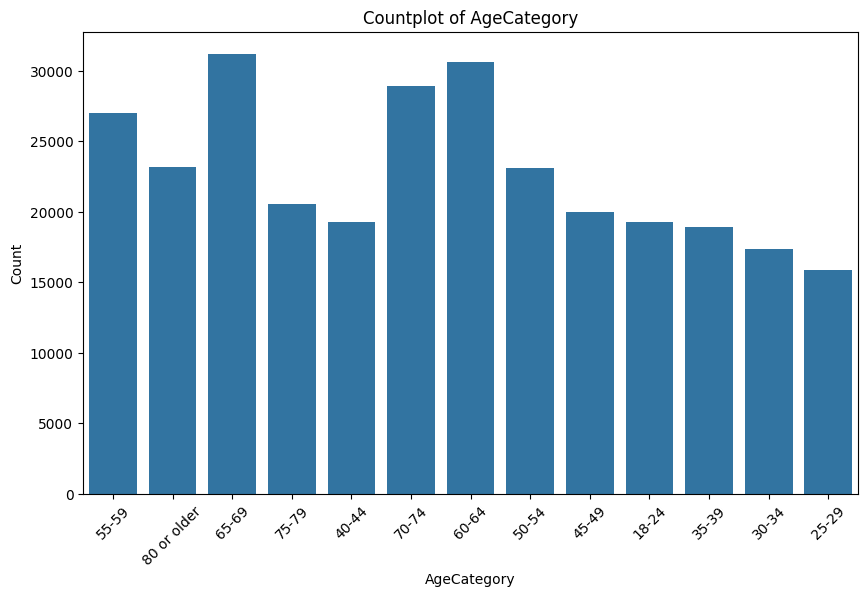

<Figure size 1000x600 with 0 Axes>

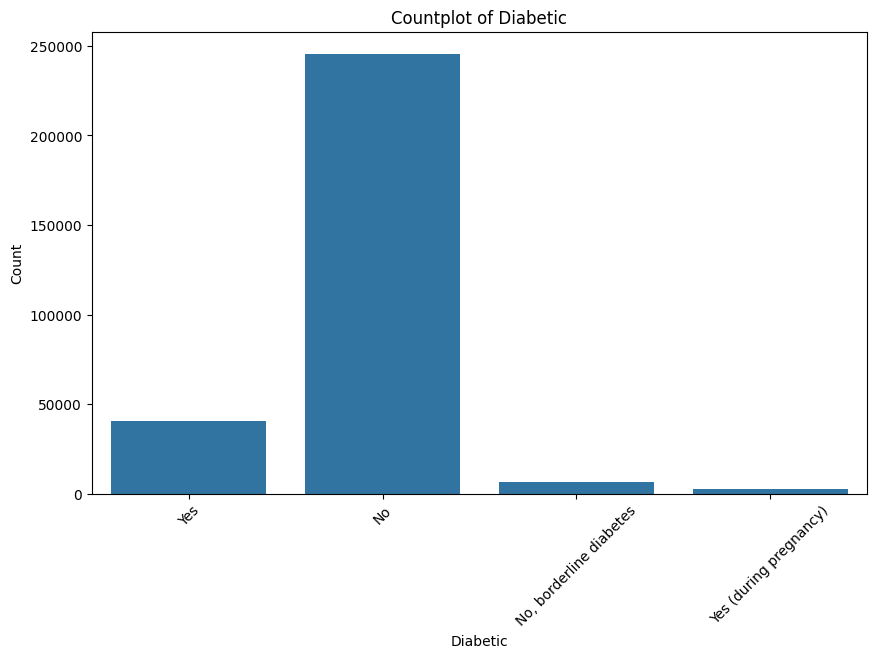

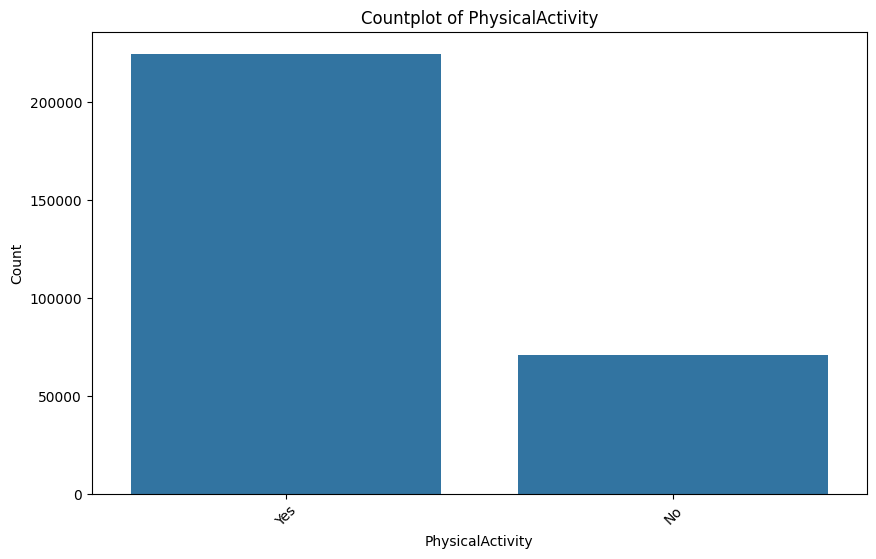

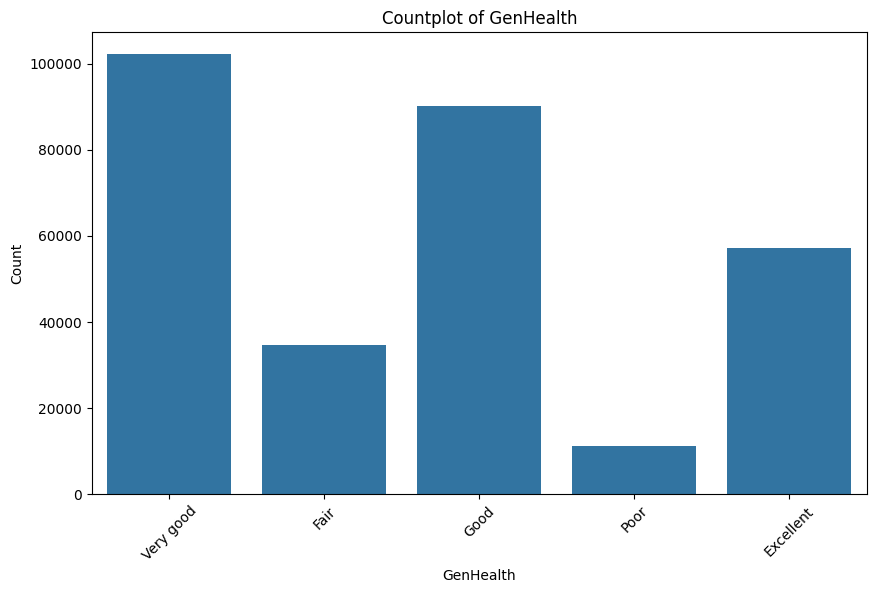

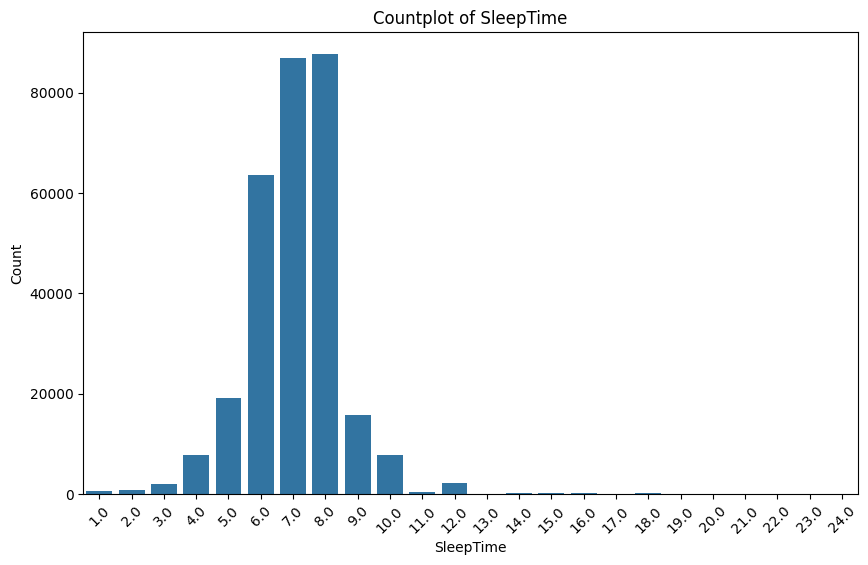

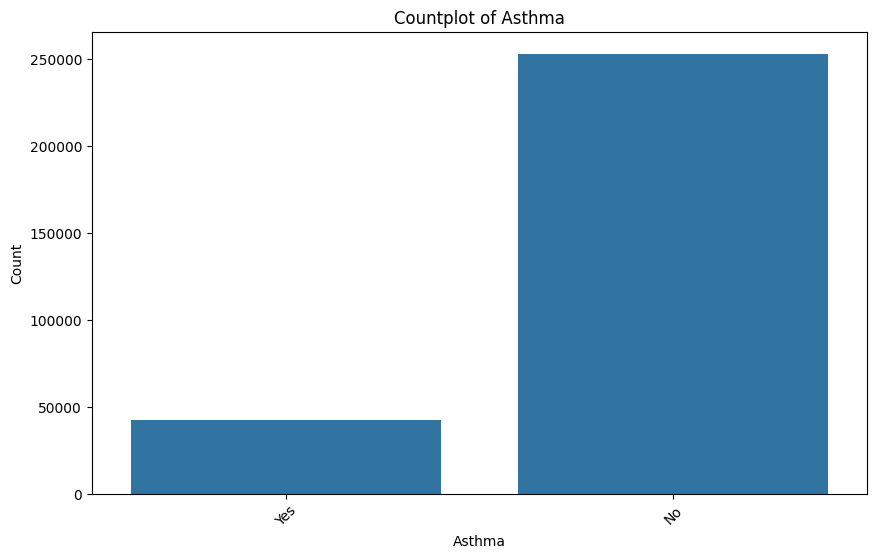

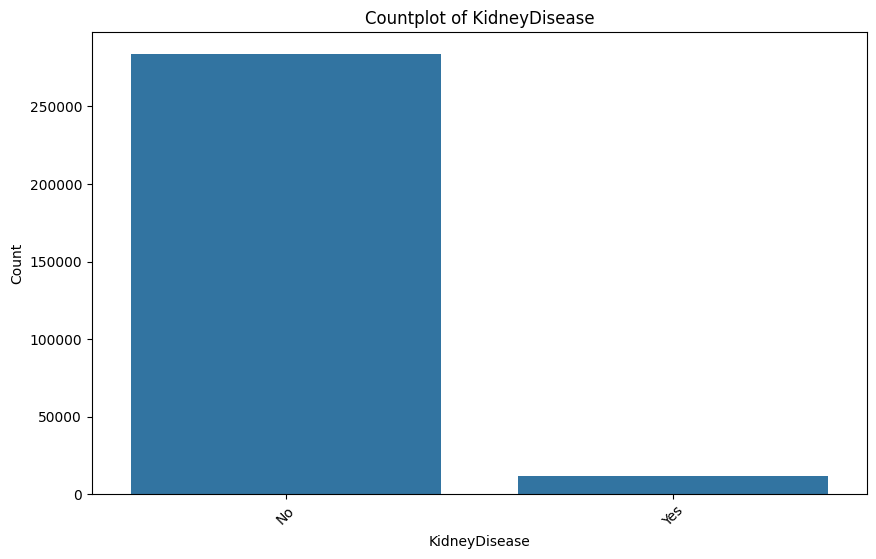

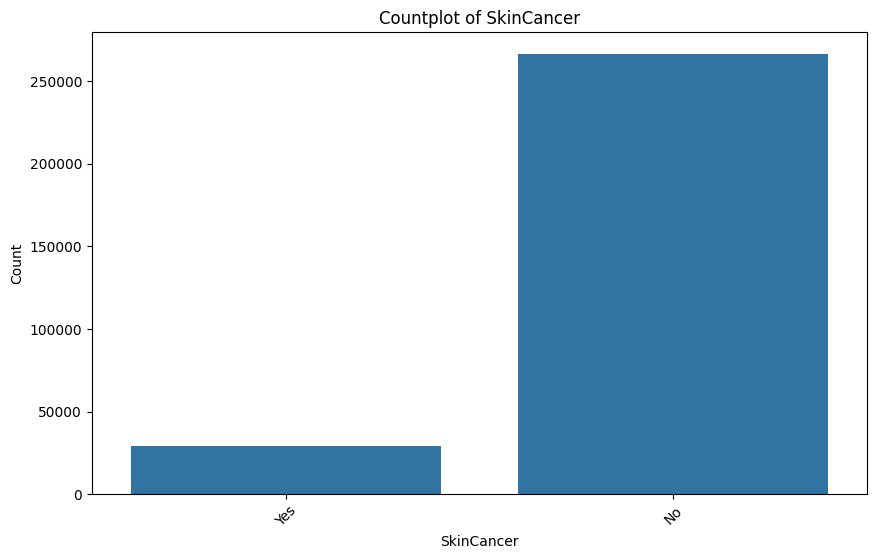

In [88]:
# Define the list of variables for multivariate analysis
variables = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
             'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
             'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
             'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Perform multivariate analysis for each variable
for var in variables:
    plt.figure(figsize=(10, 6))

    # Check if the variable is categorical
    if var in df.columns:
        # Countplot for categorical variables
        sns.countplot(data=df, x=var)
        plt.title(f'Countplot of {var}')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

    # Check if the variable is numerical
    elif var in df._get_numeric_data().columns:
        # Boxplot for numerical variables
        sns.boxplot(data=df, x=var)
        plt.title(f'Boxplot of {var}')
        plt.xlabel(var)
        plt.ylabel('Values')

    # Additional visualizations for specific variables if needed
    # Add conditions as required

    plt.show()

## Multivariate:
#### Multivariate analysis involves examining the relationships between multiple variables in a dataset to understand their interconnections, patterns,
#### and potential impact on outcomes. Here's an inference based on the provided list of variables, focusing on "HeartDisease" and its associations with
#### other factors.

### Overview of Variables:
### HeartDisease:
#### The outcome variable indicating the presence or absence of heart disease.
#### Smoking, AlcoholDrinking, Stroke, DiffWalking, Diabetic, Asthma, KidneyDisease, SkinCancer: Variables representing health behaviors or medical
#### conditions.
### PhysicalHealth, MentalHealth, PhysicalActivity, GenHealth, SleepTime:
### Indicators of general health and lifestyle.
### Sex, AgeCategory, Race: Demographic factors.
### Potential Analysis and Inferences
### Demographic Factors:
### AgeCategory:
#### Typically, heart disease is more prevalent in older age groups. A multivariate analysis might show that age is a significant predictor of heart disease.
### Sex:
#### Studies often indicate that men are at a higher risk for heart disease, but this might vary depending on other factors like age and lifestyle.
### Race:
#### Differences in heart disease prevalence across racial groups could indicate the influence of genetics, access to healthcare, or socio-economic factors.
## Lifestyle Factors:
### Smoking and AlcoholDrinking:
#### These are known risk factors for heart disease. A multivariate analysis might reveal the extent of their impact when considering other variables.
### PhysicalActivity:
#### Generally, increased physical activity correlates with a lower risk of heart disease.
### SleepTime:
#### Both too little and too much sleep can be associated with higher heart disease risk, suggesting a potential U-shaped relationship.
## Health Conditions and Behaviors:
### Diabetic, Stroke, Asthma, KidneyDisease, SkinCancer:
#### These conditions are often comorbid with heart disease. Multivariate analysis could help determine which conditions have a stronger association
#### with heart disease.
### PhysicalHealth and MentalHealth:
#### Both are significant contributors to overall well-being. A multivariate analysis could indicate whether poor physical and mental health increase
#### heart disease risk.
### DiffWalking:
#### Difficulty walking might be an indicator of mobility issues, potentially linked to heart disease.
### GenHealth:
#### A measure of general health, this could be a strong predictor of heart disease when combined with other factors.
### Statistical Methods
### Logistic Regression:
#### A common technique for analyzing binary outcomes like heart disease. This can help determine the relative importance of each variable.
### Correlation Analysis:
#### Identifies relationships between variables.
### Interaction Terms:
#### These can be used to explore how two or more variables interact and affect the risk of heart disease.
### Inference
#### A thorough multivariate analysis would likely find that certain factors are strong predictors of heart disease, such as age, physical health, and lifestyle behaviors like smoking. Demographic factors, like sex and race, might also play a role. The analysis could also highlight complex interactions between variables, such as the combined effect of physical activity and mental health on heart disease risk. Understanding these relationships can guide targeted interventions to reduce heart disease risk.

## Correlation

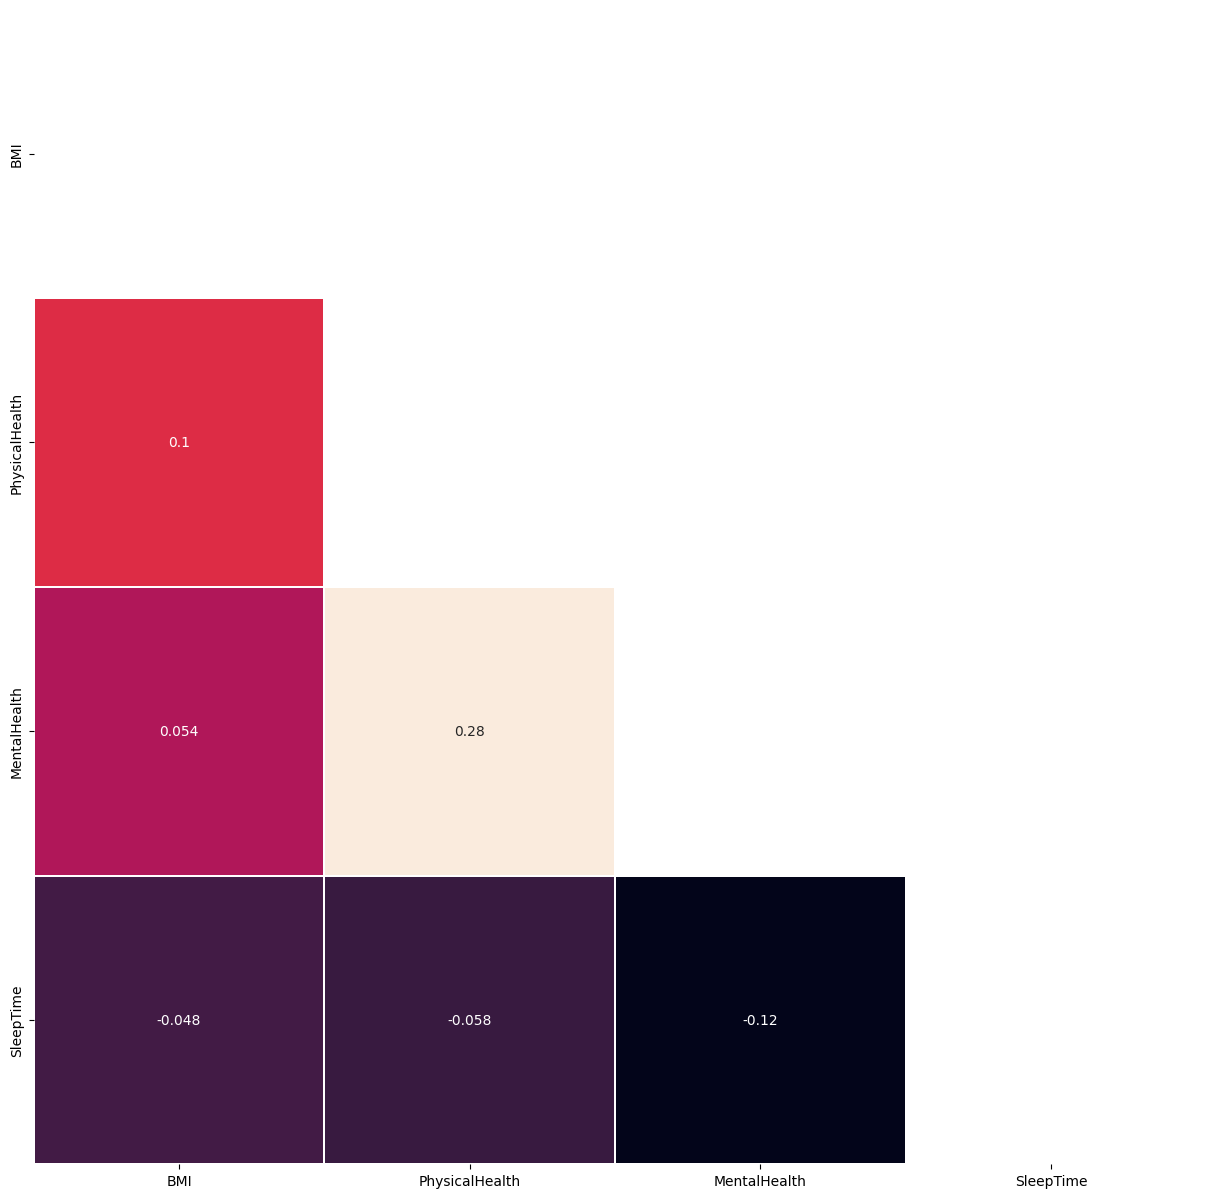

In [89]:
correlation= df_num.corr()
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()

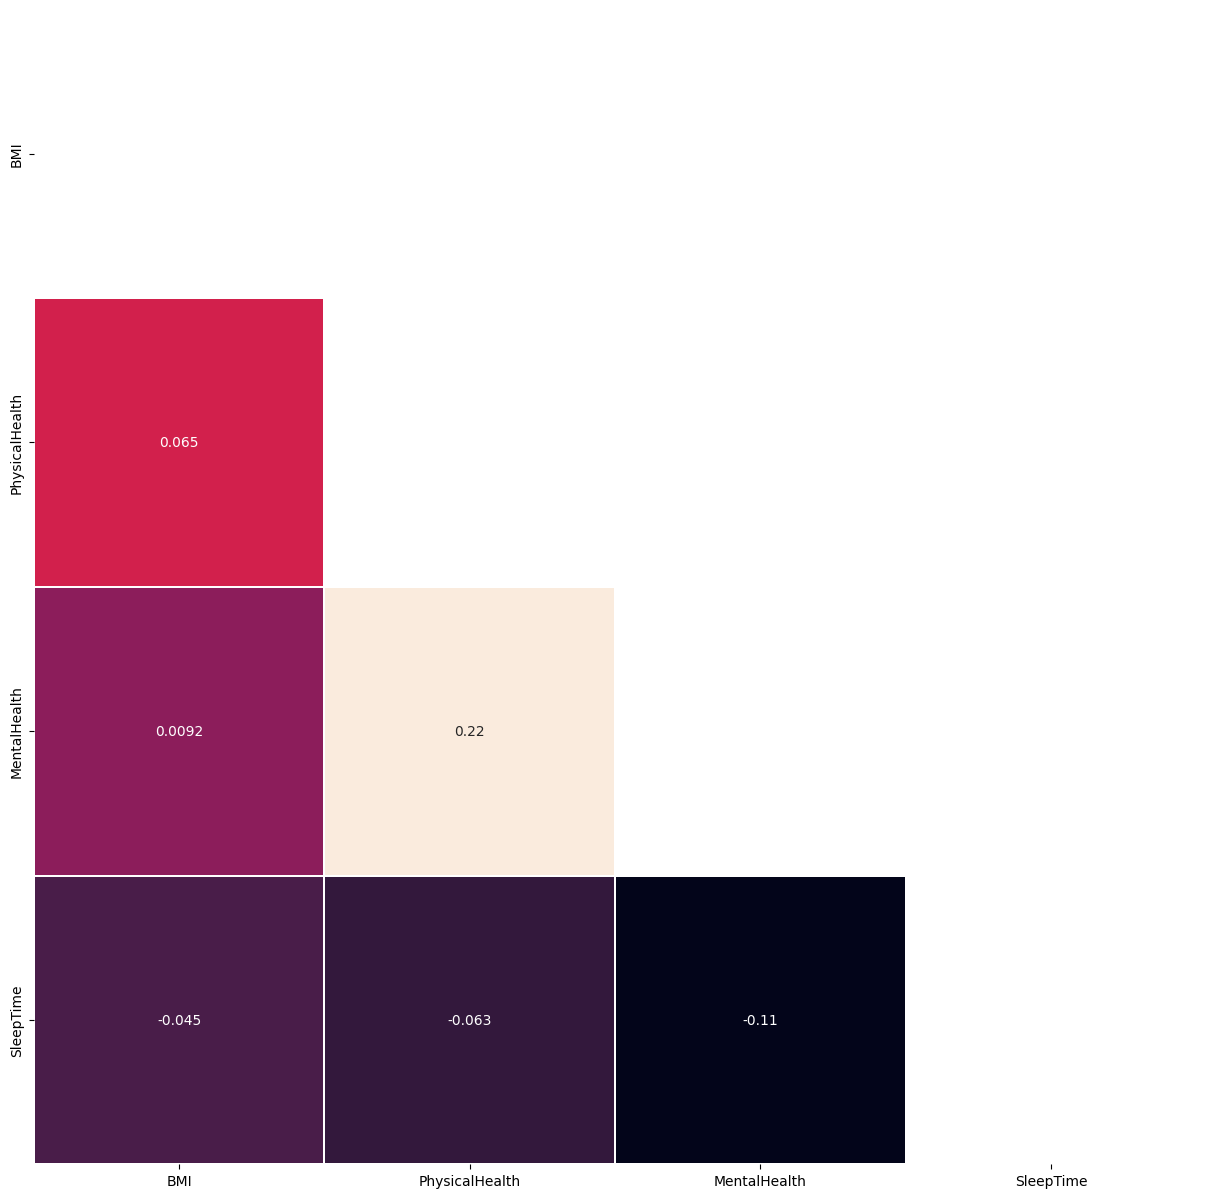

In [90]:
correlation= df_num.corr(method='kendall')
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()

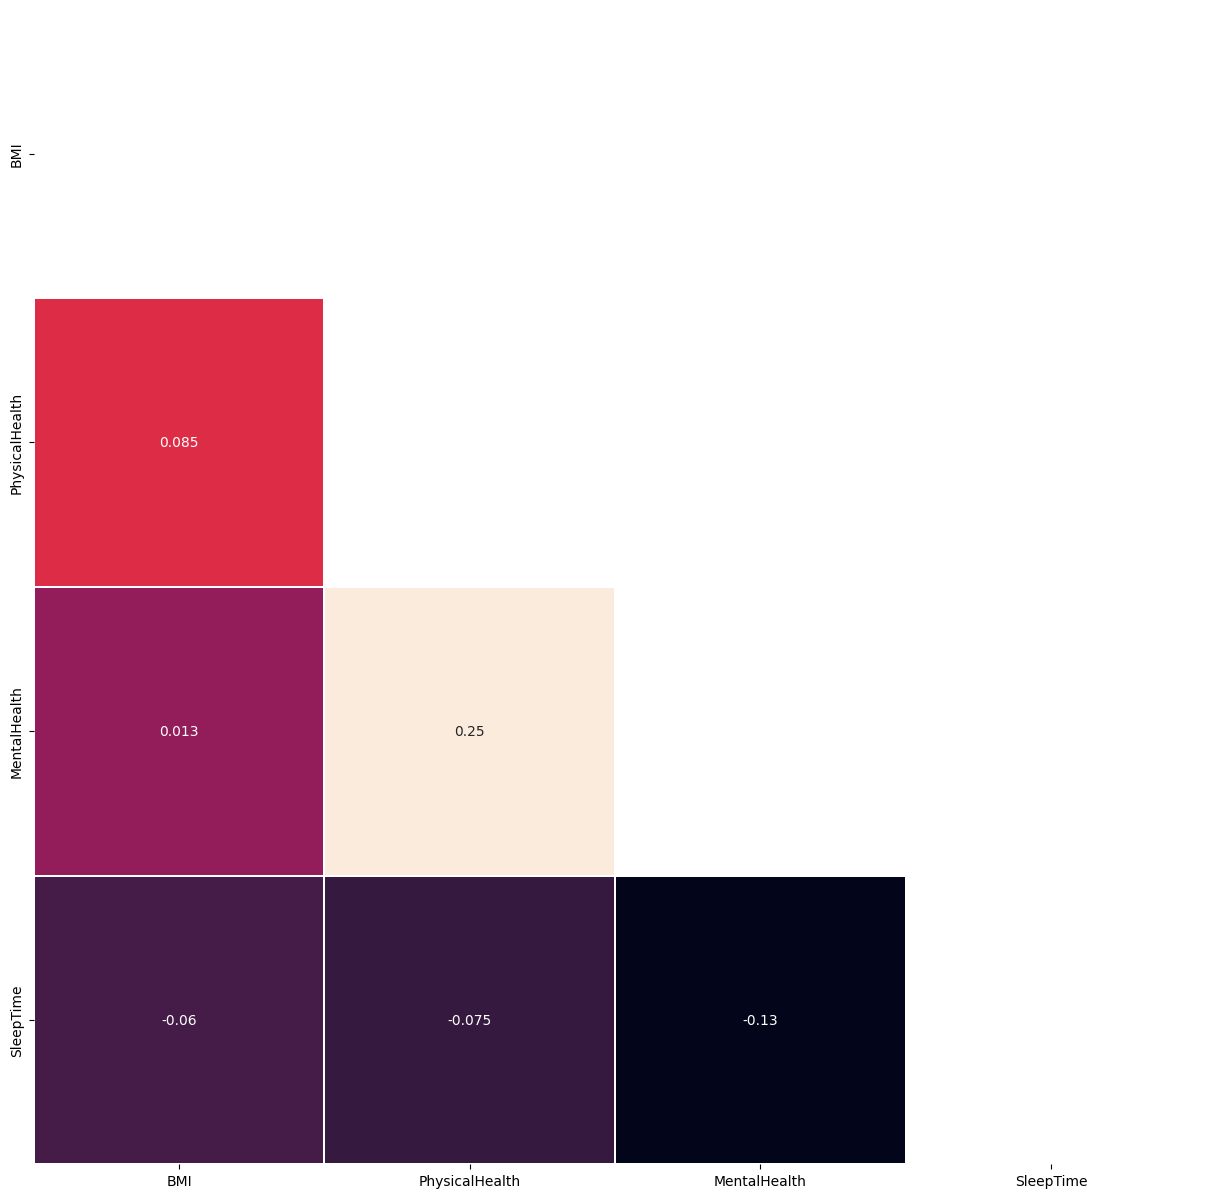

In [91]:
correlation= df_num.corr(method='spearman')
matrix = np.triu(correlation)

plt.figure(figsize=(15,15))
sns.heatmap(correlation, annot=True, linecolor="white",linewidths=0.02,mask=matrix,cbar=False)
plt.show()

## Statistical tests

In [101]:
import scipy.stats as stats

In [102]:
from scipy.stats import chi2_contingency,ttest_ind,f_oneway,pearsonr,spearmanr

In [103]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma',
       'KidneyDisease', 'SkinCancer', 'BMI_Category'],
      dtype='object')

In [104]:
columns_to_test = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                   'PhysicalActivity', 'Asthma',
                   'KidneyDisease', 'SkinCancer','AgeCategory','GenHealth','Diabetic','Sex']

p_values = []
for col in columns_to_test:
    cross_tab = pd.crosstab(df['HeartDisease'], df[col])
    _, pval, _, _ = stats.chi2_contingency(cross_tab)
    p_values.append(pval)

print(p_values)

[0.0, 7.139361378203447e-95, 0.0, 0.0, 0.0, 2.664342001788111e-74, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [105]:
p_val_cat = pd.DataFrame({'Feature': ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
                                      'PhysicalActivity', 'Asthma', 'KidneyDisease',
                                      'SkinCancer','AgeCategory','GenHealth','Diabetic','Sex'],
                         'p_values' : p_values})
p_val_cat

,Feature,p_values
0,Smoking,0.000000e+00
1,AlcoholDrinking,7.139361e-95
2,Stroke,0.000000e+00
3,DiffWalking,0.000000e+00
4,PhysicalActivity,0.000000e+00
5,Asthma,2.664342e-74
6,KidneyDisease,0.000000e+00
7,SkinCancer,0.000000e+00
8,AgeCategory,0.000000e+00
9,GenHealth,0.000000e+00


In [106]:
lst1 =['BMI','PhysicalHealth','MentalHealth','SleepTime']
for i in lst1:
    print('p_value for shapiro test', i, stats.shapiro(df[i])[1])

p_value for shapiro test BMI 0.0
p_value for shapiro test PhysicalHealth 0.0
p_value for shapiro test MentalHealth 0.0
p_value for shapiro test SleepTime 0.0


In [107]:
HeartDisease=df[df['HeartDisease']=='Yes']
No_HeartDisease=df[df['HeartDisease']=='No']
p_values=[]
for i in lst1:
    pval = stats.mannwhitneyu(HeartDisease[i],No_HeartDisease[i])[1]
    p_values.append(pval)
p_val_num = pd.DataFrame({'Feature': lst1,
                          'p_values' : p_values})
p_val_num

,Feature,p_values
0,BMI,2.082787e-178
1,PhysicalHealth,0.000000e+00
2,MentalHealth,4.238582e-24
3,SleepTime,8.589582e-10


In [108]:
significant_num_features = p_val_cat[p_val_cat['p_values']<0.05]
significant_num_features

,Feature,p_values
0,Smoking,0.000000e+00
1,AlcoholDrinking,7.139361e-95
2,Stroke,0.000000e+00
3,DiffWalking,0.000000e+00
4,PhysicalActivity,0.000000e+00
5,Asthma,2.664342e-74
6,KidneyDisease,0.000000e+00
7,SkinCancer,0.000000e+00
8,AgeCategory,0.000000e+00
9,GenHealth,0.000000e+00


In [109]:
significant_num_features = p_val_num[p_val_num['p_values']<0.05]
significant_num_features

,Feature,p_values
0,BMI,2.082787e-178
1,PhysicalHealth,0.000000e+00
2,MentalHealth,4.238582e-24
3,SleepTime,8.589582e-10


In [110]:
p_values=[]
for i in lst1:
    pval = stats.f_oneway(HeartDisease[i], No_HeartDisease[i])[1]
    p_values.append(pval)

In [111]:
p_val_num_1 = pd.DataFrame({'Feature': lst1,
                          'p_values' : p_values})
p_val_num_1[p_val_num_1['p_values']<0.05]

,Feature,p_values
0,BMI,6.520516e-136
1,PhysicalHealth,0.000000e+00
2,MentalHealth,2.338068e-22
3,SleepTime,3.903526e-10


In [117]:
Heart_Disease=final_df[final_df['HeartDisease']==1]
No_Heart_Disease=final_df[final_df['HeartDisease']==0]

In [118]:
lst2 =['Sex', 'AgeCategory', 'Diabetic', 'GenHealth','Smoking','AlcoholDrinking', 'Stroke',
       'DiffWalking','PhysicalActivity','Asthma', 'KidneyDisease', 'SkinCancer']
p_values = []
for column in lst2:
    pval = stats.f_oneway(Heart_Disease[column], No_Heart_Disease[column])[1]
    p_values.append(pval)

In [119]:
p_val_cat_1 = pd.DataFrame({'Feature': lst2,
                          'p_values' : p_values})
p_val_cat_1[p_val_cat_1['p_values']<0.05]

,Feature,p_values
0,Sex,0.000000e+00
1,AgeCategory,0.000000e+00
2,Diabetic,0.000000e+00
3,GenHealth,4.550631e-13
4,Smoking,0.000000e+00
5,AlcoholDrinking,4.753479e-95
6,Stroke,0.000000e+00
7,DiffWalking,0.000000e+00
8,PhysicalActivity,0.000000e+00
9,Asthma,2.057722e-74


In [120]:
group1 = df[df['HeartDisease'] == 'Yes']['BMI']
group2 = df[df['HeartDisease'] == 'No']['BMI']

t_stat, p_val = ttest_ind(group1, group2, equal_var=False)
print(f'T-test result: t-statistic = {t_stat}, p-value = {p_val}')

T-test result: t-statistic = 24.529953714449757, p-value = 1.0863772795475913e-131


In [121]:
# Correaltion test

pearson_corr, pearson_p_val = pearsonr(df['BMI'], df['PhysicalHealth'])
print(f'Pearson correlation: {pearson_corr}, p-value = {pearson_p_val}')

# Example: calculating Spearman correlation coefficient between 'BMI' and 'PhysicalHealth'
spearman_corr, spearman_p_val = spearmanr(df['BMI'], df['PhysicalHealth'])
print(f'Spearman correlation: {spearman_corr}, p-value = {spearman_p_val}')

Pearson correlation: 0.10180173978912202, p-value = 0.0
Spearman correlation: 0.08464710640920536, p-value = 0.0


# DATA ENCODING

In [92]:
cols=df_cat[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
             'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']]

In [93]:
cols.replace({'Yes': 1, 'No': 0}, inplace=True)

In [94]:
cols.head(2)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,0,1,0,0,0,1,1,0,1
1,0,0,0,1,0,1,0,0,0


In [95]:
df_cat['Sex'].replace({'Female': 1, 'Male': 0}, inplace=True)

In [ ]:
df_cat['Sex']

0         1
1         1
2         0
3         1
4         1
         ..
319790    0
319791    0
319792    1
319793    1
319794    1
Name: Sex, Length: 295450, dtype: int64

In [96]:
df['AgeCategory'].value_counts().sort_values(ascending=True)

AgeCategory
25-29          15851
30-34          17407
35-39          18936
40-44          19258
18-24          19263
45-49          19980
75-79          20569
50-54          23120
80 or older    23221
55-59          27044
70-74          28953
60-64          30642
65-69          31206
Name: count, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode=df_cat[['GenHealth','AgeCategory','Diabetic']]
label_encoders = {}

for col in cols_to_encode:
    label_encoders[col] = LabelEncoder()
    df_cat[col] = label_encoders[col].fit_transform(df_cat[col])

In [98]:
df_cat.drop(columns=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
              'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'],axis=1,inplace=True)

In [99]:
df_cat=pd.concat([df_cat,cols],axis=1)

In [100]:
df_cat.head(2)

,Sex,AgeCategory,Diabetic,GenHealth,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer
0,1,7,2,4,0,1,0,0,0,1,1,0,1
1,1,12,0,4,0,0,0,1,0,1,0,0,0


In [115]:
final_df=pd.concat([df_cat,df_num],axis=1)

In [116]:
final_df.head()

,Sex,AgeCategory,Diabetic,GenHealth,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1,7,2,4,0,1,0,0,0,1,1,0,1,16.60,3.0,30.0,5.0
1,1,12,0,4,0,0,0,1,0,1,0,0,0,20.34,0.0,0.0,7.0
2,0,9,2,1,0,1,0,0,0,1,1,0,0,26.58,20.0,30.0,8.0
3,1,11,0,2,0,0,0,0,0,0,0,0,1,24.21,0.0,0.0,6.0
4,1,4,0,4,0,0,0,0,1,1,0,0,0,23.71,28.0,0.0,8.0


# BASE MODEL

In [122]:
x=final_df.drop(columns='HeartDisease',axis=1)
y=final_df['HeartDisease']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=100)

In [123]:
def model_validation(model, xtrain, ytrain, xtest, ytest):
    m = model
    m.fit(xtrain, ytrain)
    pred_h = m.predict(xtest)

    # Confusion Matrix
    cm = confusion_matrix(ytest, pred_h)
    print('Confusion Matrix:')
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()

    # Classification Report
    print('Classification Report:')
    print(classification_report(ytest, pred_h))

    # ROC Curve
    pred_s = m.predict_proba(xtest)[:, 1]
    print('ROC AUC:', roc_auc_score(ytest, pred_s))
    fpr, tpr, thres = roc_curve(ytest, pred_s)
    plt.plot([0, 1], [0, 1], ls='--', color='red')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    global df_score
    df_score=pd.DataFrame({'Model':model_name,'Accuracy':accu,'Recall':recl,'Precision':prec,'F1 score':f1})
    return m

In [124]:
accu=[]
recll=[]
prec=[]
f1_pos=[]
f1_neg=[]
model_name=[]

def model_validation(model,xtrain,ytrain,xtest,ytest):
    m=model
    m.fit(xtrain,ytrain)
    pred_h=m.predict(xtest)
    pred_s=m.predict_proba(xtest)[:,1]
     # Confusion Matrix
    cm = confusion_matrix(ytest, pred_h)
    print('Confusion Matrix:')
    print(cm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()
    print('Classification report : \n',classification_report(ytest,pred_h))

    # ROC Curve
    pred_s = m.predict_proba(xtest)[:, 1]
    print('ROC AUC:', roc_auc_score(ytest, pred_s))
    fpr, tpr, thres = roc_curve(ytest, pred_s)
    plt.plot([0, 1], [0, 1], ls='--', color='red')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')


    resp=input('Do you want to keep this model ? yes')
    if resp.lower()=='yes':
        model_name.append(m.__class__.__name__)
        accu.append(accuracy_score(ytest,pred_h))
        recll.append(recall_score(ytest,pred_h))
        prec.append(precision_score(ytest,pred_h))
        f1_pos.append(f1_score(ytest,pred_h))
        f1_neg.append(f1_score(ytest,pred_h,pos_label=0))
        global df_score
        df_score=pd.DataFrame({'Model':model_name,'Accuracy':accu,'Recall':recll,'Precision':prec,'f1-score(1)':f1_pos,'f1-score(0)':f1_neg})

        return m

## Logistic Regression:
    
### The model chosen for this task was Logistic Regression, which is a suitable choice for binary classification problems where the target variable is either "Yes" or "No".

## Why Logistic Regression?

### Simplicity: Logistic regression provides a straightforward interpretation of coefficients, allowing us to understand the effect of each feature on the likelihood of readmission.

### Efficiency: It performs well with large datasets and is computationally inexpensive compared to more complex models.

### Probability Outputs: Logistic regression provides probabilities for classification, making it easier to interpret the likelihood of a patient being readmitted.
    

Confusion Matrix:
[[53178   473]
 [ 4953   486]]


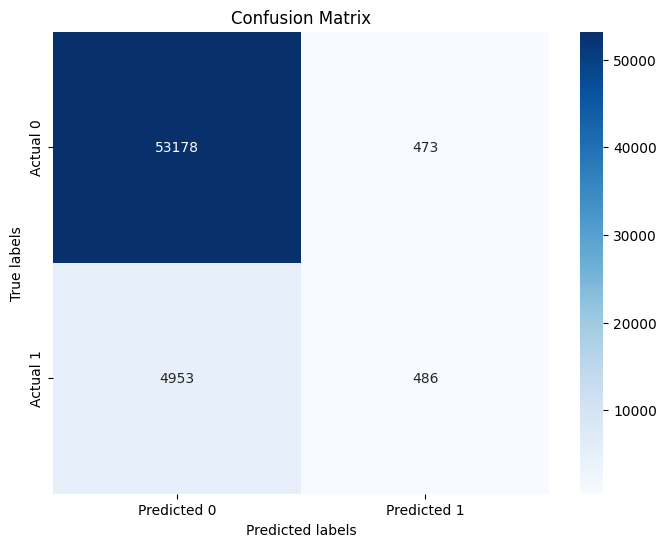

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     53651
           1       0.51      0.09      0.15      5439

    accuracy                           0.91     59090
   macro avg       0.71      0.54      0.55     59090
weighted avg       0.88      0.91      0.88     59090

ROC AUC: 0.8196441356813817
Do you want to keep this model ? yesyes


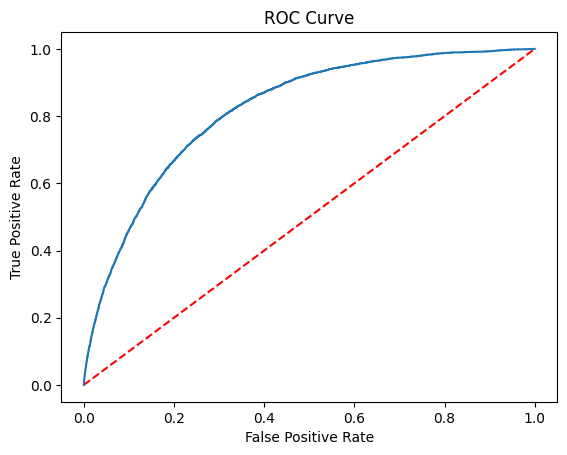

In [125]:
LR_model=model_validation(LogisticRegression(),xtrain,ytrain,xtest,ytest)

### Decision tree

Confusion Matrix:
[[53347   304]
 [ 5135   304]]


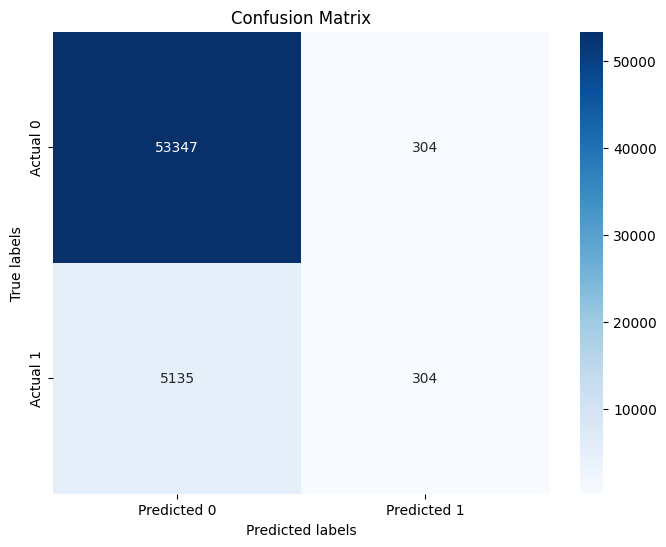

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     53651
           1       0.50      0.06      0.10      5439

    accuracy                           0.91     59090
   macro avg       0.71      0.53      0.53     59090
weighted avg       0.87      0.91      0.87     59090

ROC AUC: 0.8191885224146639


Do you want to keep this model ? yes yes


DecisionTreeClassifier(max_depth=8)

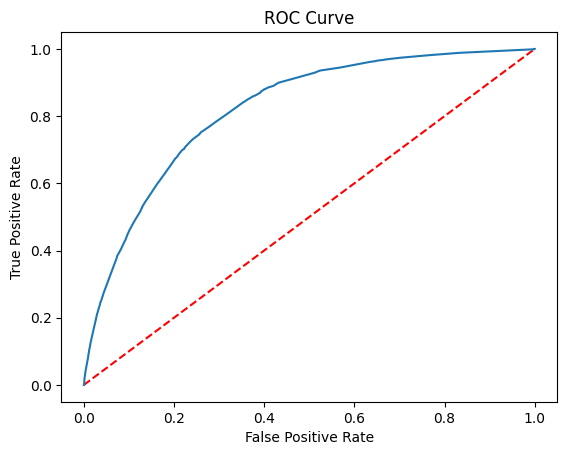

In [ ]:
model_validation(DecisionTreeClassifier(max_depth=8),xtrain,ytrain,xtest,ytest)

In [ ]:
df_score

,Model,Accuracy,Recall,Precision,f1-score(1),f1-score(0)
0,LogisticRegression,0.908276,0.087700,0.51016,0.149671,0.951523
1,DecisionTreeClassifier,0.907954,0.055893,0.50000,0.100546,0.951495


#### GAusian NB

Confusion Matrix:
[[47081  6570]
 [ 2994  2445]]


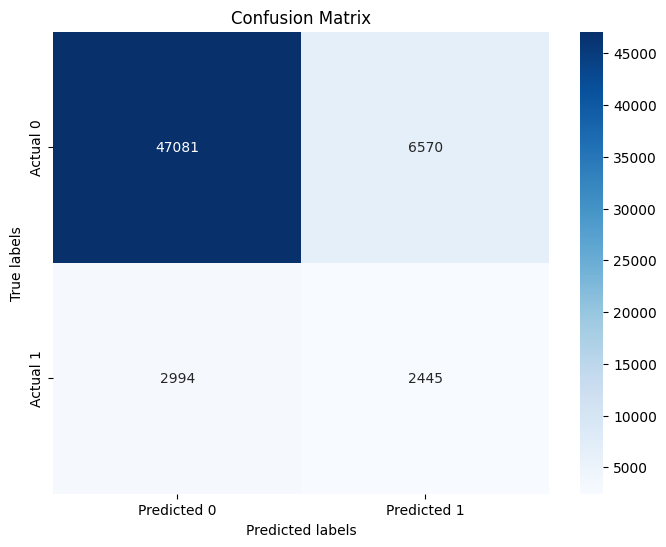

Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91     53651
           1       0.27      0.45      0.34      5439

    accuracy                           0.84     59090
   macro avg       0.61      0.66      0.62     59090
weighted avg       0.88      0.84      0.86     59090

ROC AUC: 0.7895921225735342


Do you want to keep this model ? yes yes


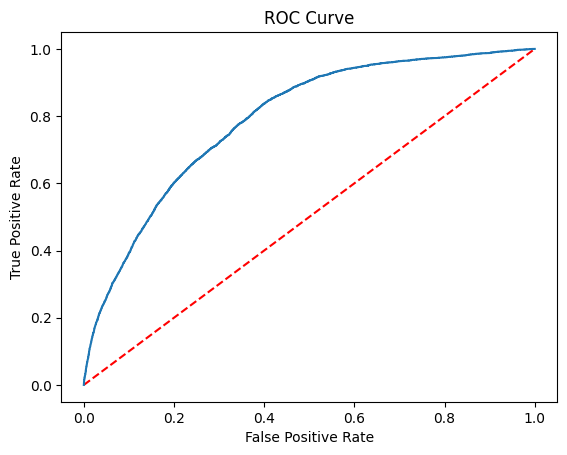

In [ ]:
nb=model_validation(GaussianNB(),xtrain,ytrain,xtest,ytest)

In [ ]:
df_score

,Model,Accuracy,Recall,Precision,f1-score(1),f1-score(0)
0,LogisticRegression,0.908276,0.087700,0.510160,0.149671,0.951523
1,DecisionTreeClassifier,0.907954,0.055893,0.500000,0.100546,0.951495
2,GaussianNB,0.838145,0.449531,0.271215,0.338315,0.907796
3,RandomForestClassifier,0.895397,0.123368,0.321977,0.178386,0.944143


#### Random Forest

Confusion Matrix:
[[52238  1413]
 [ 4768   671]]


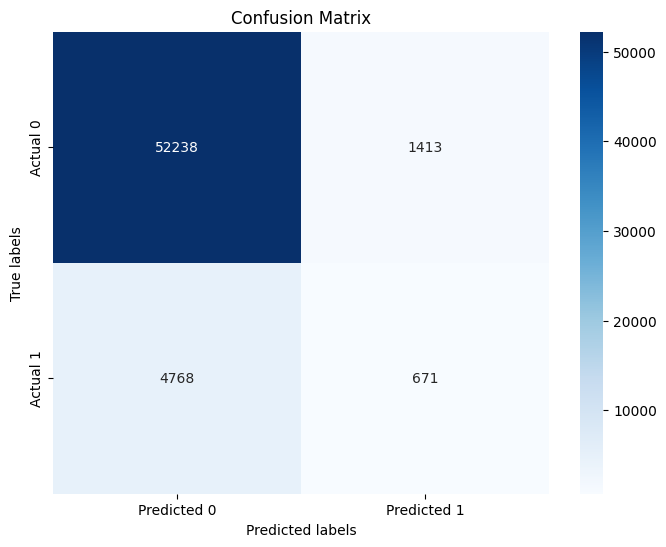

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     53651
           1       0.32      0.12      0.18      5439

    accuracy                           0.90     59090
   macro avg       0.62      0.55      0.56     59090
weighted avg       0.86      0.90      0.87     59090

ROC AUC: 0.778655485100845


Do you want to keep this model ? yes yes


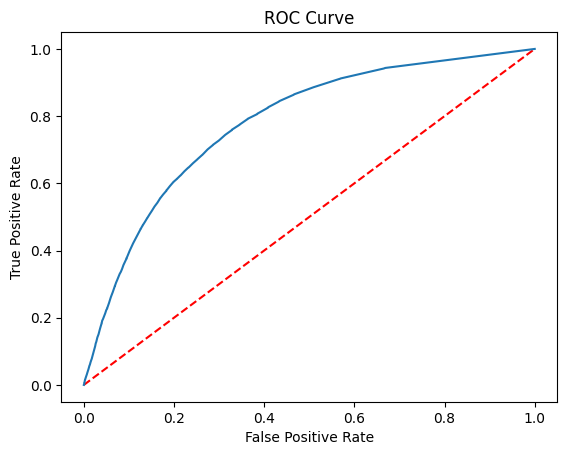

In [ ]:
rf=model_validation(RandomForestClassifier(n_estimators=150),xtrain,ytrain,xtest,ytest)

#### ADA Bosst

Confusion Matrix:
[[53076   575]
 [ 4824   615]]


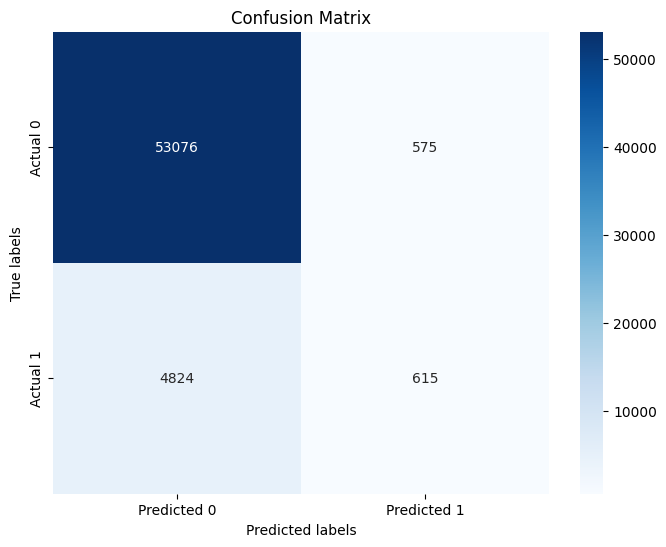

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53651
           1       0.52      0.11      0.19      5439

    accuracy                           0.91     59090
   macro avg       0.72      0.55      0.57     59090
weighted avg       0.88      0.91      0.88     59090

ROC AUC: 0.8318001323124381


Do you want to keep this model ? yes yes


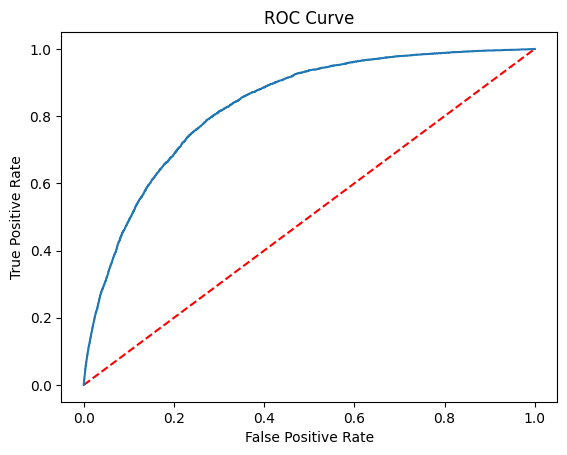

In [ ]:
ada=model_validation(AdaBoostClassifier(n_estimators=150),xtrain,ytrain,xtest,ytest)

#### Gradient Boost

Confusion Matrix:
[[53035   616]
 [ 4891   548]]


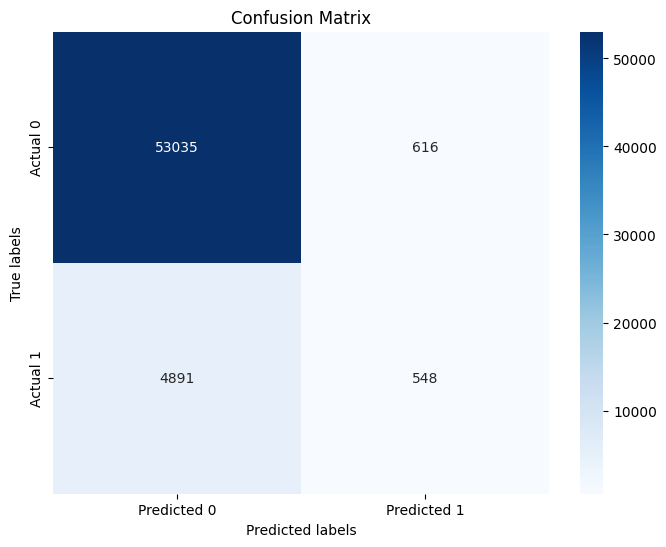

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53651
           1       0.47      0.10      0.17      5439

    accuracy                           0.91     59090
   macro avg       0.69      0.54      0.56     59090
weighted avg       0.87      0.91      0.88     59090

ROC AUC: 0.8244326593352174


Do you want to keep this model ? yes yes


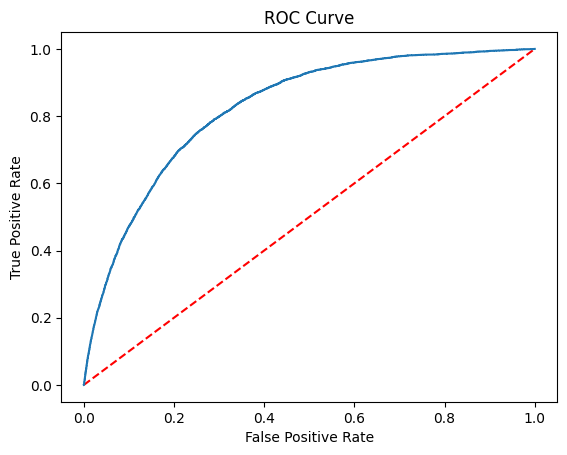

In [ ]:
gbc=model_validation(GradientBoostingClassifier(n_estimators=150,max_depth=9),xtrain,ytrain,xtest,ytest)

#### XG BOOSt

Confusion Matrix:
[[53051   600]
 [ 4863   576]]


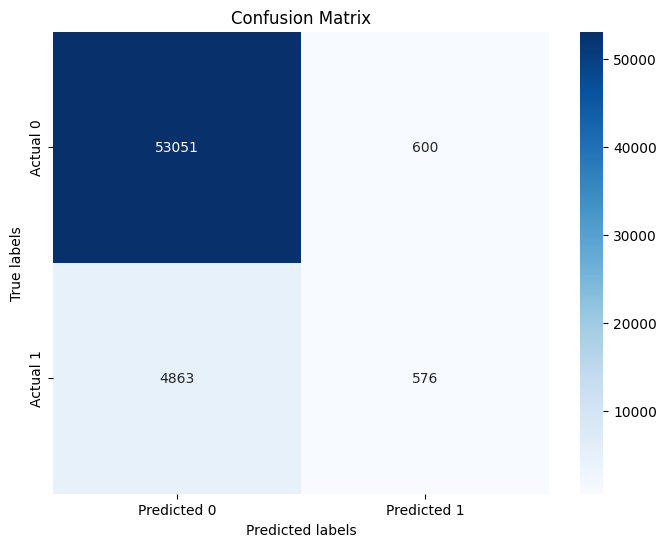

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53651
           1       0.49      0.11      0.17      5439

    accuracy                           0.91     59090
   macro avg       0.70      0.55      0.56     59090
weighted avg       0.88      0.91      0.88     59090

ROC AUC: 0.8245648747916047


Do you want to keep this model ? yes yes


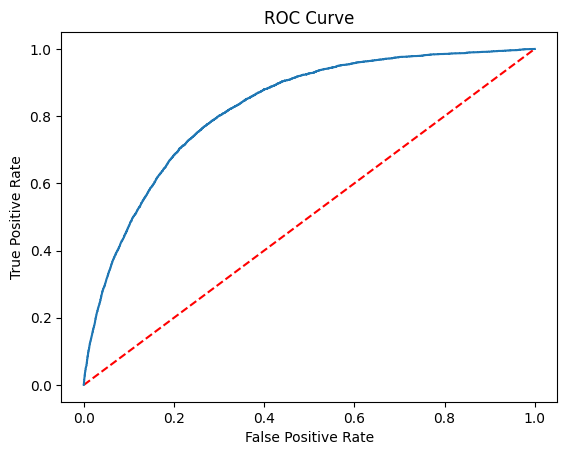

In [ ]:
xgb=model_validation(XGBClassifier(n_estimators=100,max_depth=7),xtrain,ytrain,xtest,ytest)

#### Voting

Confusion Matrix:
[[53319   332]
 [ 5085   354]]


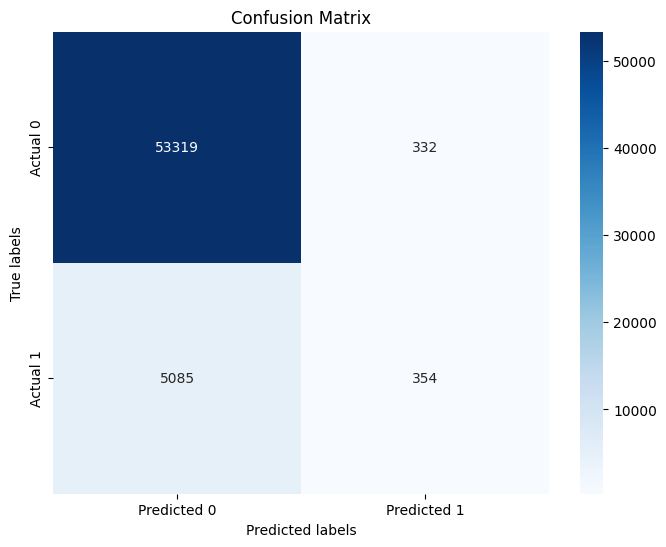

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     53651
           1       0.52      0.07      0.12      5439

    accuracy                           0.91     59090
   macro avg       0.71      0.53      0.53     59090
weighted avg       0.88      0.91      0.87     59090

ROC AUC: 0.8299245381006605


Do you want to keep this model ? yes yes


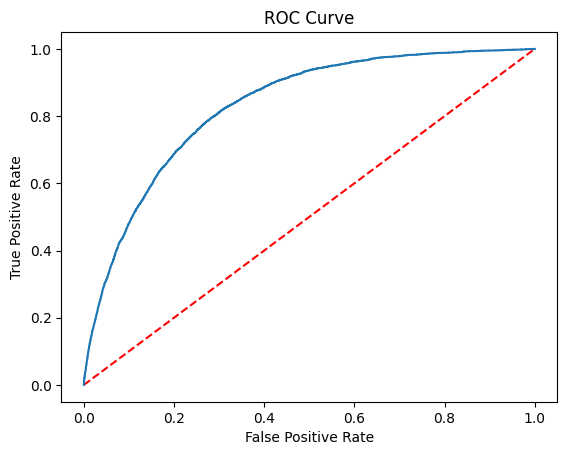

In [ ]:
base_models = [('DT',DecisionTreeClassifier(max_depth=8)),
              ('RF',RandomForestClassifier(n_estimators=150,max_depth=13)),
              ('ADABoost',AdaBoostClassifier(n_estimators=200)),
              ('GB',GradientBoostingClassifier(n_estimators=150,max_depth=10))]
voting = model_validation(VotingClassifier(estimators=base_models,voting = 'soft'),
                         xtrain,ytrain,xtest,ytest)

####  Stacking Classifier

Confusion Matrix:
[[53030   621]
 [ 4896   543]]


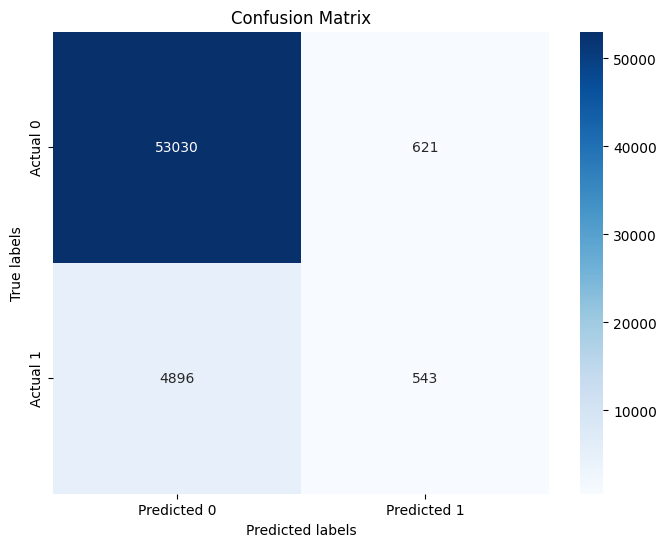

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     53651
           1       0.47      0.10      0.16      5439

    accuracy                           0.91     59090
   macro avg       0.69      0.54      0.56     59090
weighted avg       0.87      0.91      0.88     59090

ROC AUC: 0.8123139440942064


Do you want to keep this model ? yes yes


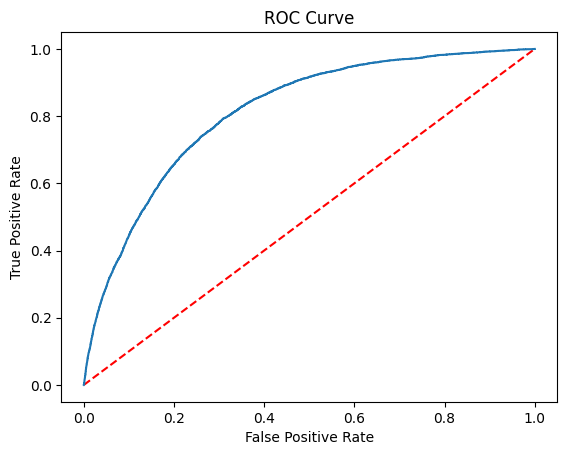

In [ ]:
stacking=model_validation(StackingClassifier(estimators=base_models,final_estimator=XGBClassifier(n_estimators=150,max_depth=10)),xtrain,ytrain,xtest,ytest)

### Model Fine Tuning XGB Bosst

In [ ]:
grid={'n_estimators':[100,150,200,250,300,350],
     'gamma':[0,1,2,3],
     'max_depth':[7,10,13,16,19]}

In [ ]:
gscv_xgb=GridSearchCV(estimator=XGBClassifier(),param_grid=grid,scoring='recall',cv=5,verbose=1)

In [ ]:
gscv_xgb.fit(xtrain,ytrain)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'gamma': [0, 1, 2, 3],
                         'max_depth': [7, 10, 13, 16, 19],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='recall', verbose=1)

In [126]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [127]:
sfs=SequentialFeatureSelector(estimator=XGBClassifier(),k_features='best',forward=True,scoring='r2')
sfs.fit(xtrain,ytrain)

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  device=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  multi_strategy=None,
                                                  n_estimators=None,
                                                  n_jobs=None,
                                                  num_parallel_tree=None,
                                                  random_state=None, ...),
                          k_features=(1, 16), scoring='r2')

In [128]:
sfs.k_feature_names_

('Sex', 'AgeCategory', 'GenHealth', 'Stroke', 'KidneyDisease', 'SleepTime')

Confusion Matrix:
[[53319   332]
 [ 5077   362]]


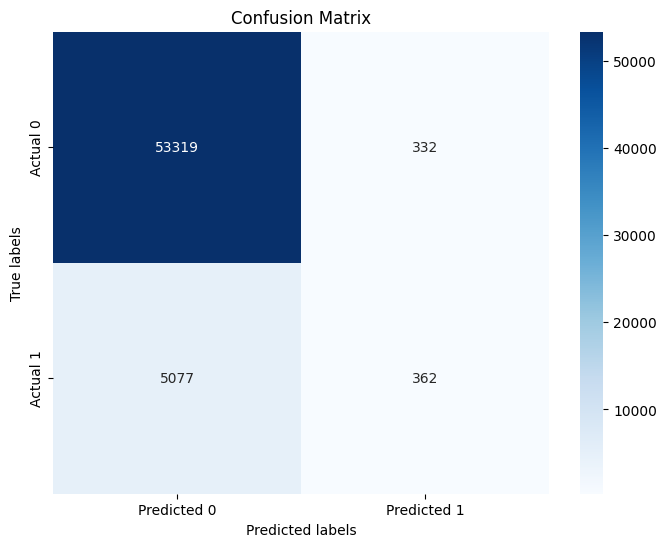

Classification report : 
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     53651
           1       0.52      0.07      0.12      5439

    accuracy                           0.91     59090
   macro avg       0.72      0.53      0.53     59090
weighted avg       0.88      0.91      0.87     59090

ROC AUC: 0.8256619119923492
Do you want to keep this model ? yesyes


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

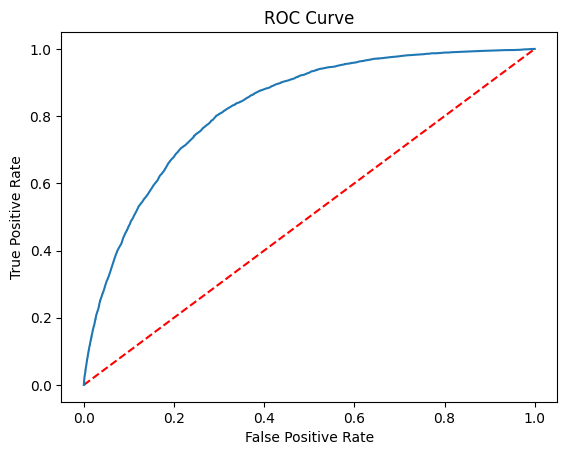

In [129]:
X=final_df[['Sex', 'AgeCategory', 'GenHealth', 'Stroke', 'KidneyDisease', 'SleepTime']]
Y=final_df['HeartDisease']
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,train_size=0.8,random_state=100)
model_validation(XGBClassifier(),Xtrain, Ytrain,Xtest,Ytest)

#### Final Model

Confusion Matrix:
[[51761  1890]
 [ 4575   864]]


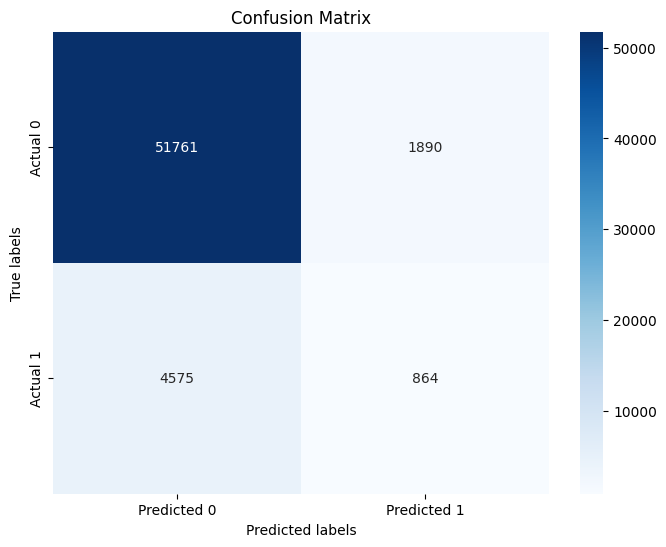

Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     53651
           1       0.31      0.16      0.21      5439

    accuracy                           0.89     59090
   macro avg       0.62      0.56      0.58     59090
weighted avg       0.86      0.89      0.87     59090

ROC AUC: 0.7667707800630366


Do you want to keep this model ? yes yes


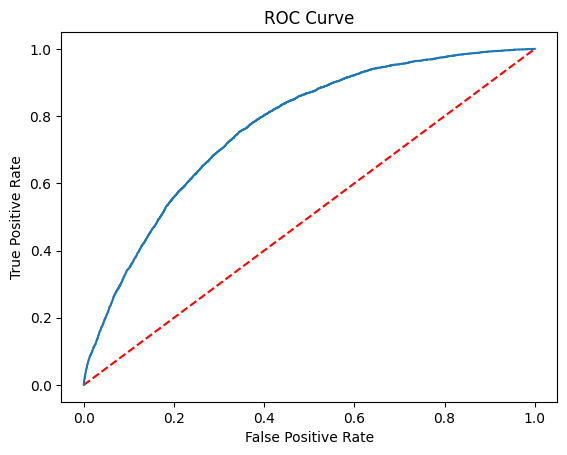

In [ ]:
final_model = model_validation(XGBClassifier(**gscv_xgb.best_params_),
                              xtrain, ytrain,xtest,ytest)

In [ ]:
df_score

,Model,Accuracy,Recall,Precision,f1-score(1),f1-score(0)
0,LogisticRegression,0.908276,0.087700,0.510160,0.149671,0.951523
1,DecisionTreeClassifier,0.907954,0.055893,0.500000,0.100546,0.951495
2,GaussianNB,0.838145,0.449531,0.271215,0.338315,0.907796
3,RandomForestClassifier,0.895397,0.123368,0.321977,0.178386,0.944143
4,AdaBoostClassifier,0.908631,0.113072,0.516807,0.185548,0.951601
5,GradientBoostingClassifier,0.906803,0.100754,0.470790,0.165985,0.950644
6,XGBClassifier,0.907548,0.105902,0.489796,0.174150,0.951033
7,VotingClassifier,0.908326,0.065085,0.516035,0.115592,0.951658
8,StackingClassifier,0.906634,0.099835,0.466495,0.164471,0.950554
9,XGBClassifier,0.890591,0.158853,0.313725,0.210912,0.941220


In [ ]:
# prediction explaining Heart disease is present

In [ ]:
final_model.predict(([[1,11,0,1,1,0,0,1,0,0,0,0,28.87,6,0,12]]))[0]

1

In [ ]:
## prediction explaining Heart disease is not present

In [ ]:
final_model.predict(([[1,11,0,1,1,0,0,1,0,0,0,0,28.87,6,0,4]]))[0]

0

In [ ]:
df_score

,Model,Accuracy,Recall,Precision,f1-score(1),f1-score(0)
0,LogisticRegression,0.908276,0.087700,0.510160,0.149671,0.951523
1,DecisionTreeClassifier,0.907954,0.055893,0.500000,0.100546,0.951495
2,GaussianNB,0.838145,0.449531,0.271215,0.338315,0.907796
3,RandomForestClassifier,0.895397,0.123368,0.321977,0.178386,0.944143
4,AdaBoostClassifier,0.908631,0.113072,0.516807,0.185548,0.951601
5,GradientBoostingClassifier,0.906803,0.100754,0.470790,0.165985,0.950644
6,XGBClassifier,0.907548,0.105902,0.489796,0.174150,0.951033
7,VotingClassifier,0.908326,0.065085,0.516035,0.115592,0.951658
8,StackingClassifier,0.906634,0.099835,0.466495,0.164471,0.950554
9,XGBClassifier,0.890591,0.158853,0.313725,0.210912,0.941220


## Theoritical Task

In [ ]:
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Feature Values(x1,x2,...,xn): Represent the features in xtrain and xtest.

Intercept: Learned by the model, accessible via model.intercept_

Coefficients: These coefficients are learned by the model during training and determine the influence of each feature on the predicted outcome, accessible via model.coef_

Sigmoid Function: Applied automatically within logistic regression to transform the linear combination of the inputs into a probability. The sigmoid function ensures that the output is a value between 0 and 1, representing the probability of class 1.


